In [144]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import polars as pl
path= r"C:\Users\inesm\OneDrive\Documentos\tfg\ModeloFriedkin\resultados_2025-11-22_181833"
path_results= r"C:\Users\inesm\OneDrive\Documentos\tfg\ModeloFriedkin\resultados_2025-11-22_181833\summary_metrics_AGG.csv"
path_runs = r"C:\Users\inesm\OneDrive\Documentos\tfg\ModeloFriedkin\resultados_2025-11-22_181833\runs"

In [145]:
df_agg = pd.read_csv(path_results)

In [146]:
df_agg.head()
df_agg.columns

Index(['tag', 'n', 'trolls', 'p', 'lam', 'regimen', 'loc', 'fracTrolls',
       'mean_rho_W', 'mean_rho_LW', 'mean_rangoFinal', 'mean_stdFinal',
       'mean_convTime', 'mean_P_norm_vs_trolls', 'mean_propNegNormals',
       'mean_medianFinalNormals', 'mean_resid_fp', 'mean_medianFinal',
       'mean_meanFinal', 'std_convTime', 'std_rangoFinal', 'std_stdFinal',
       'prop_stochastic', 'prop_substochastic', 'prop_isStrongLW',
       'mean_nSCC_W', 'mean_nSCC_LW', 'mean_periodW', 'mean_periodLW',
       'prop_isStrongW', 'prop_isPrimLW', 'mean_nSCC_W_over_n',
       'mean_nSCC_LW_over_n', 'mean_rho_emp_W', 'mean_NDI', 'mean_P2',
       'mean_P4', 'prop_consenso', 'mean_k_needed'],
      dtype='object')

In [147]:

print(df_agg["prop_consenso"].value_counts())
print(df_agg["prop_substochastic"].value_counts())
print(df_agg["prop_stochastic"].value_counts())
print(df_agg["mean_rho_LW"].value_counts())
print(df_agg["mean_periodLW"].value_counts())

df_agg["mean_convTime"].isna().sum()


prop_consenso
0    180
Name: count, dtype: int64
prop_substochastic
1    180
Name: count, dtype: int64
prop_stochastic
1    180
Name: count, dtype: int64
mean_rho_LW
0.500000    6
0.200000    6
0.200000    3
0.350000    3
0.800000    3
           ..
0.456807    1
0.406346    1
0.627607    1
0.562224    1
0.500118    1
Name: count, Length: 148, dtype: int64
mean_periodLW
1.0    30
Name: count, dtype: int64


np.int64(0)

In [148]:
df_sel = df_agg[[ 'n', 'trolls', 'p', 'lam', 'regimen', 'loc', 'fracTrolls',
        'mean_rho_LW', 'mean_rangoFinal', 'mean_stdFinal',
       'mean_convTime', 'mean_P_norm_vs_trolls', 'std_convTime',
       'std_rangoFinal', 'std_stdFinal',
       'prop_isStrongLW', 'mean_nSCC_LW',
       'mean_periodLW', 'prop_isPrimLW', 'mean_nSCC_LW_over_n', 
       'mean_NDI', 'mean_P2', 'mean_P4', 'mean_k_needed']]

In [149]:
df_cor = df_sel[[ 'trolls',
        'mean_rho_LW', 'mean_rangoFinal', 'mean_stdFinal',
       'mean_convTime', 'mean_P_norm_vs_trolls', 
       'std_rangoFinal', 
       'prop_isStrongLW', 'mean_nSCC_LW',
       'mean_NDI', 'mean_P2', 'mean_P4',  ]]
corr = df_cor.select_dtypes(include='number').corr()

corr[corr.abs() > 0.6]

trolls  mean_rho_LW  mean_rangoFinal  mean_stdFinal  \
trolls                 1.000000          NaN         0.621378       0.806839   
mean_rho_LW                 NaN     1.000000              NaN            NaN   
mean_rangoFinal        0.621378          NaN         1.000000       0.942264   
mean_stdFinal          0.806839          NaN         0.942264       1.000000   
mean_convTime               NaN     0.736595              NaN            NaN   
mean_P_norm_vs_trolls -0.647241          NaN              NaN            NaN   
std_rangoFinal              NaN          NaN              NaN            NaN   
prop_isStrongLW             NaN          NaN        -0.663505      -0.631567   
mean_nSCC_LW           0.848499          NaN              NaN       0.667662   
mean_NDI               0.763296          NaN         0.850119       0.946250   
mean_P2                     NaN    -0.619175              NaN            NaN   
mean_P4                     NaN          NaN              NaN            NaN   

                       mean_convTime  mean_P_norm_vs_trolls  std_rangoFinal  \
trolls                           NaN              -0.647241             NaN   
mean_rho_LW                 0.736595                    NaN             NaN   
mean_rangoFinal                  NaN                    NaN             NaN   
mean_stdFinal                    NaN                    NaN             NaN   
mean_convTime               1.000000                    NaN             NaN   
mean_P_norm_vs_trolls            NaN               1.000000             NaN   
std_rangoFinal                   NaN                    NaN             1.0   
prop_isStrongLW                  NaN                    NaN             NaN   
mean_nSCC_LW                     NaN                    NaN             NaN   
mean_NDI                         NaN                    NaN             NaN   
mean_P2                    -0.601379                    NaN             NaN   
mean_P4                    -0.685929                    NaN             NaN   

                       prop_isStrongLW  mean_nSCC_LW  mean_NDI   mean_P2  \
trolls                             NaN      0.848499  0.763296       NaN   
mean_rho_LW                        NaN           NaN       NaN -0.619175   
mean_rangoFinal              -0.663505           NaN  0.850119       NaN   
mean_stdFinal                -0.631567      0.667662  0.946250       NaN   
mean_convTime                      NaN           NaN       NaN -0.601379   
mean_P_norm_vs_trolls              NaN           NaN       NaN       NaN   
std_rangoFinal                     NaN           NaN       NaN       NaN   
prop_isStrongLW               1.000000           NaN       NaN       NaN   
mean_nSCC_LW                       NaN      1.000000       NaN       NaN   
mean_NDI                           NaN           NaN  1.000000       NaN   
mean_P2                            NaN           NaN       NaN  1.000000   
mean_P4                            NaN           NaN       NaN  0.865054   

                        mean_P4  
trolls                      NaN  
mean_rho_LW                 NaN  
mean_rangoFinal             NaN  
mean_stdFinal               NaN  
mean_convTime         -0.685929  
mean_P_norm_vs_trolls       NaN  
std_rangoFinal              NaN  
prop_isStrongLW             NaN  
mean_nSCC_LW                NaN  
mean_NDI                    NaN  
mean_P2                0.865054  
mean_P4                1.000000

In [150]:
import numpy as np

corr = df_cor.select_dtypes(include='number').corr()

upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool))
strong_pairs = (
    upper.stack()
         .reset_index()
)
strong_pairs.columns = ['var1', 'var2', 'corr']

strong_pairs = strong_pairs[strong_pairs['corr'].abs() > 0.6] \
                           .sort_values('corr', ascending=False)

strong_pairs


var1                   var2      corr
35    mean_stdFinal               mean_NDI  0.946250
21  mean_rangoFinal          mean_stdFinal  0.942264
64          mean_P2                mean_P4  0.865054
27  mean_rangoFinal               mean_NDI  0.850119
7            trolls           mean_nSCC_LW  0.848499
2            trolls          mean_stdFinal  0.806839
8            trolls               mean_NDI  0.763296
13      mean_rho_LW          mean_convTime  0.736595
34    mean_stdFinal           mean_nSCC_LW  0.667662
1            trolls        mean_rangoFinal  0.621378
43    mean_convTime                mean_P2 -0.601379
19      mean_rho_LW                mean_P2 -0.619175
33    mean_stdFinal        prop_isStrongLW -0.631567
4            trolls  mean_P_norm_vs_trolls -0.647241
25  mean_rangoFinal        prop_isStrongLW -0.663505
44    mean_convTime                mean_P4 -0.685929

Resultados geometricos

In [151]:
import polars as pl
import pandas as pd
import statsmodels.formula.api as smf
import numpy as np

model1 = smf.ols(
    "mean_convTime ~ mean_rho_LW * trolls + prop_isPrimLW",
    data=df_sel
).fit()

print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:          mean_convTime   R-squared:                       0.815
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                     192.4
Date:                Sat, 22 Nov 2025   Prob (F-statistic):           6.28e-63
Time:                        18:37:10   Log-Likelihood:                -522.04
No. Observations:                 180   AIC:                             1054.
Df Residuals:                     175   BIC:                             1070.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              3.1911      1

<Figure size 1200x600 with 0 Axes>

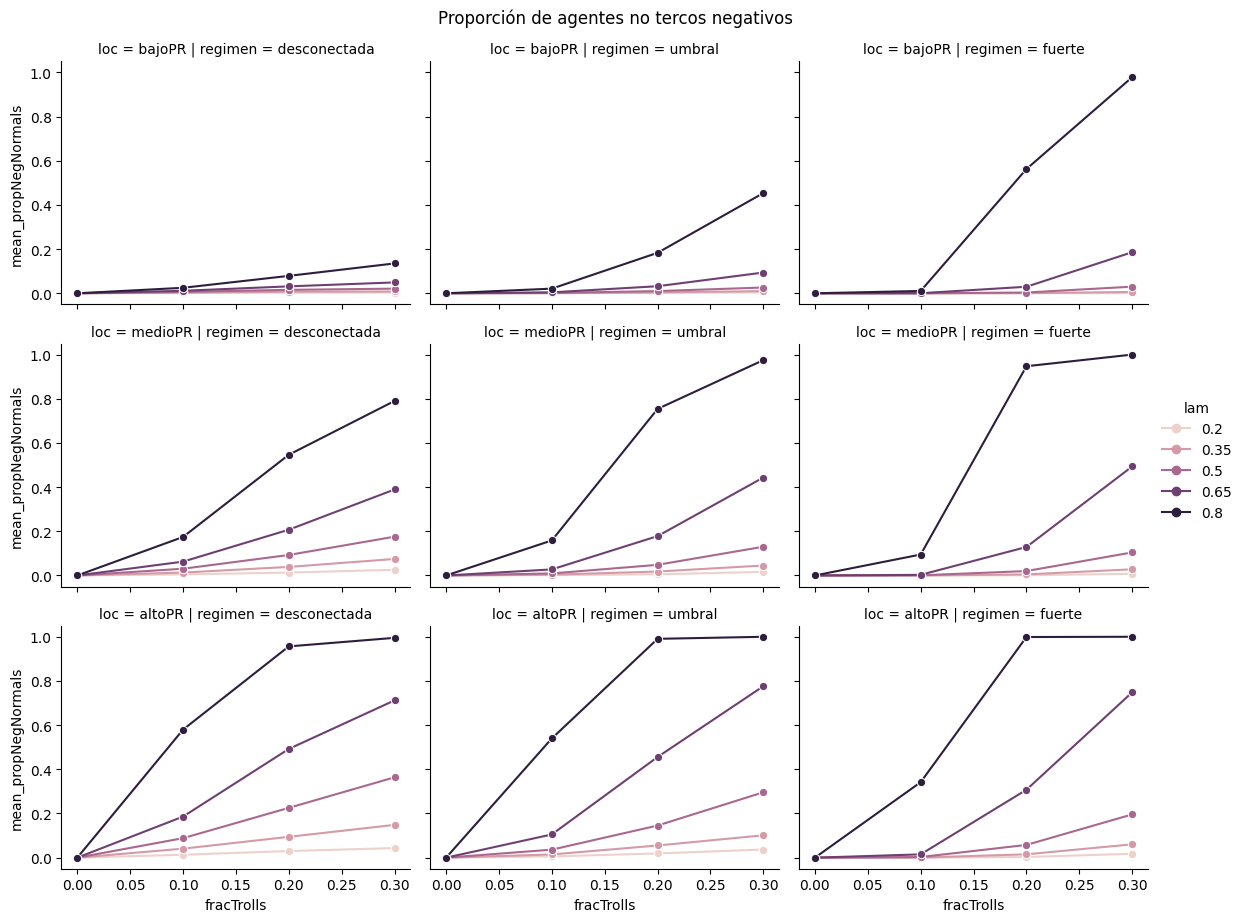

In [186]:
plt.figure(figsize=(12,6))
sns.relplot(
    data=df_agg,
    x="fracTrolls",
    y="mean_propNegNormals",
    col="regimen",
    row="loc",
    hue="lam",
    kind="line",
    marker= "o",
    height=3,
    aspect=1.3
)
plt.suptitle("Proporción de agentes no tercos negativos", y=1.02)
plt.show()

<Figure size 1200x600 with 0 Axes>

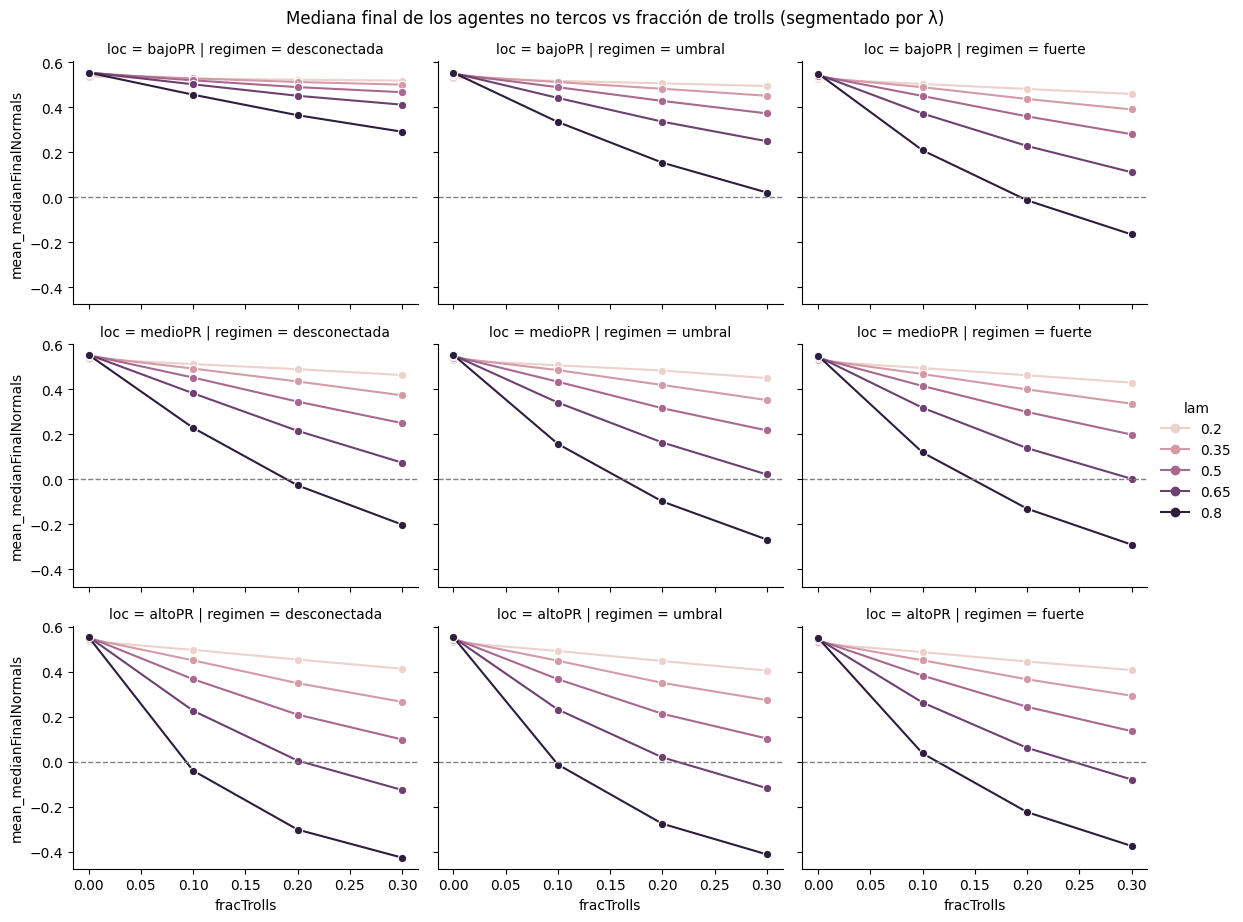

In [204]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12,6))
g = sns.relplot(
    data=df_agg,
    x="fracTrolls",
    y="mean_medianFinalNormals",
    col="regimen",
    row="loc",
    hue="lam",
    kind="line",
    marker= "o",
    row_order=["bajoPR", "medioPR", "altoPR"],
    col_order=["desconectada", "umbral", "fuerte"],
    height=3,
    aspect=1.3
)
for ax in g.axes.flat:
    ax.axhline(0, color="gray", linewidth=1, linestyle="--")

g.fig.suptitle("Mediana final de los agentes no tercos vs fracción de trolls (segmentado por λ)", y=1.02)
plt.show()

<Figure size 1200x600 with 0 Axes>

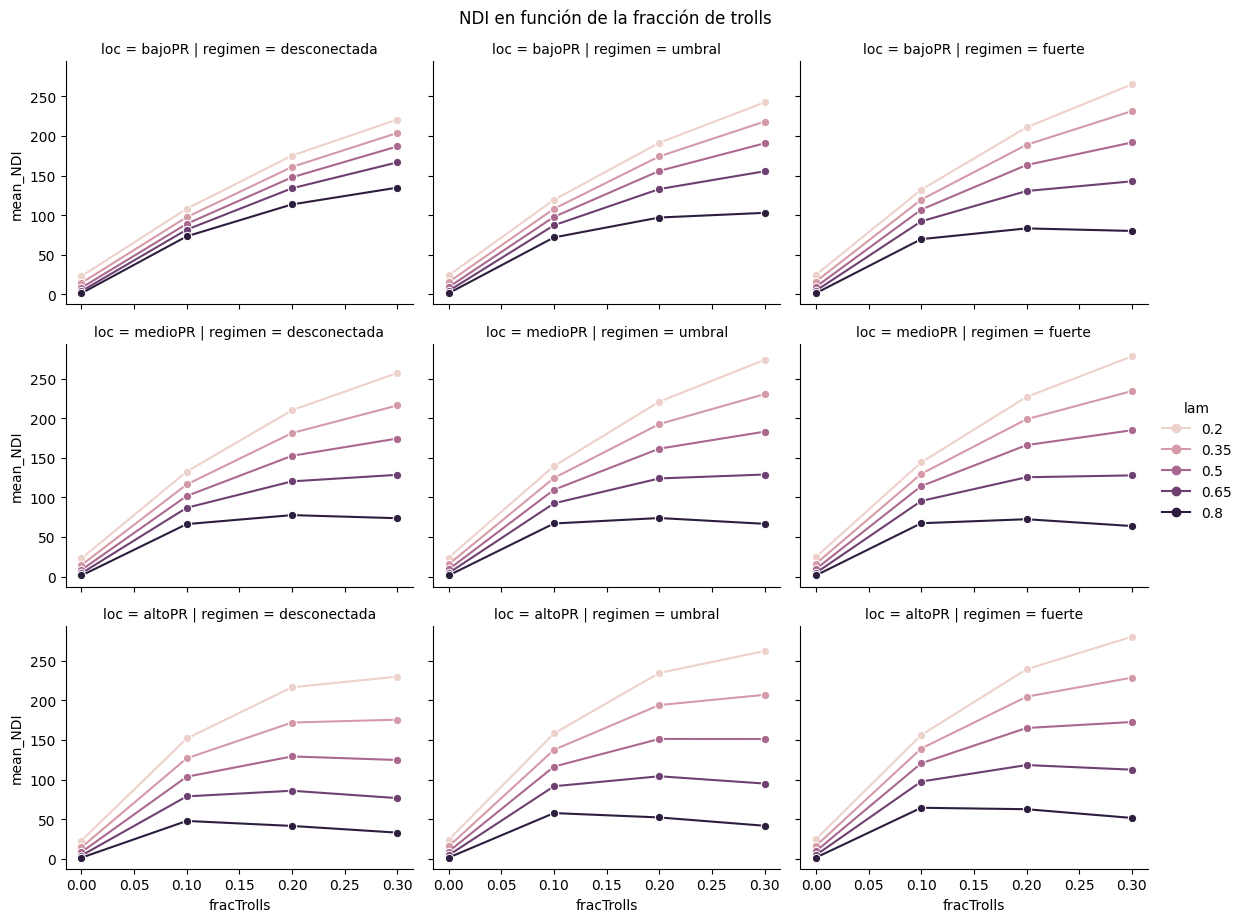

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
sns.relplot(
    data=df_sel,
    x="fracTrolls",
    y="mean_NDI",
    col="regimen",
    row="loc",
    hue="lam",
    kind="line",
    marker= "o",
    row_order=["bajoPR", "medioPR", "altoPR"],
    col_order=["desconectada", "umbral", "fuerte"],
    height=3,
    aspect=1.3
)
plt.suptitle(" en función de la fracción de trolls", y=1.02)
plt.show()

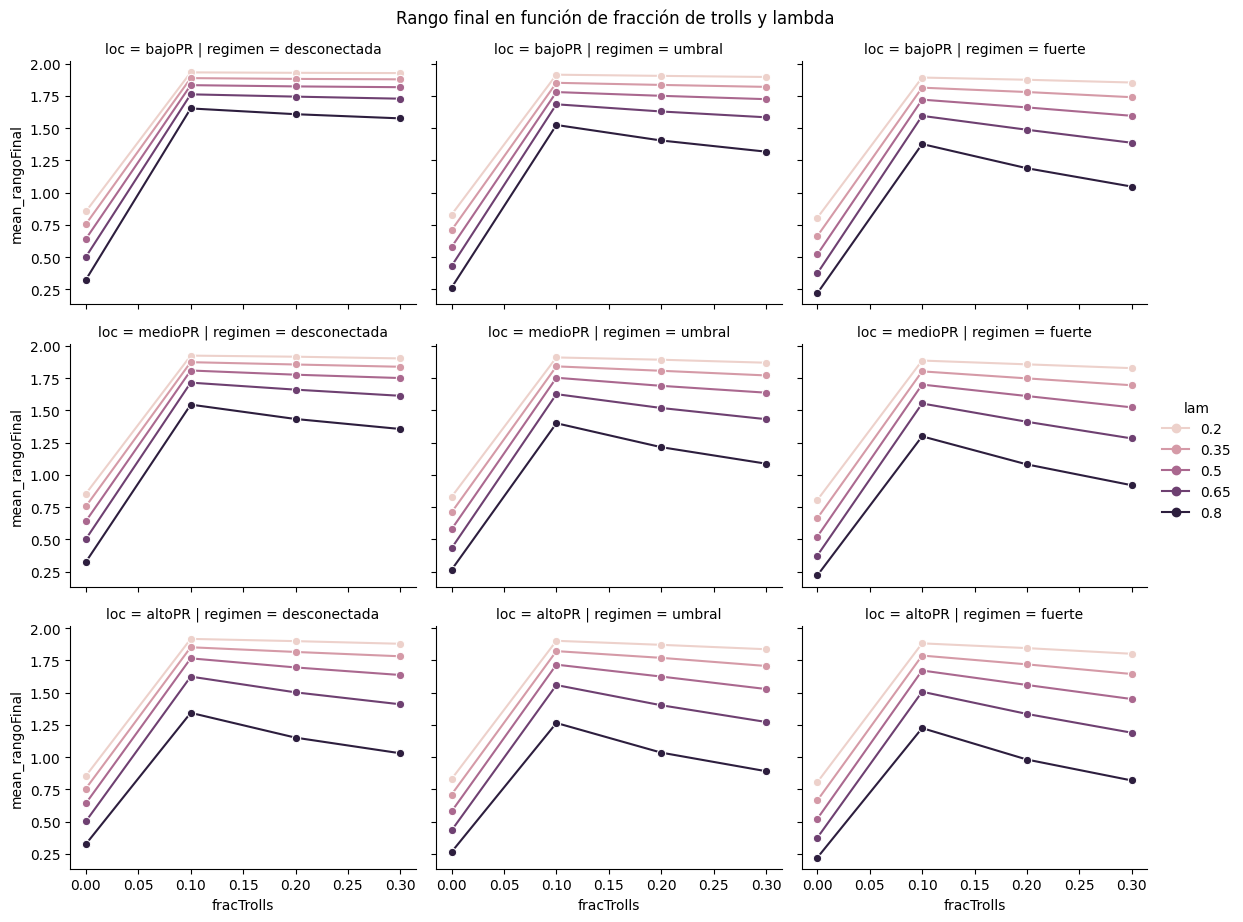

In [190]:
sns.relplot(
    data=df_sel,
    x="fracTrolls",
    y="mean_rangoFinal",
    col="regimen",
    row="loc",
    hue= "lam",
    kind="line",
    marker= "o",
    row_order=["bajoPR", "medioPR", "altoPR"],
    col_order=["desconectada", "umbral", "fuerte"],
    height=3,
    aspect=1.3
)
plt.suptitle("Rango final en función de fracción de trolls y lambda", y=1.02)
plt.show()

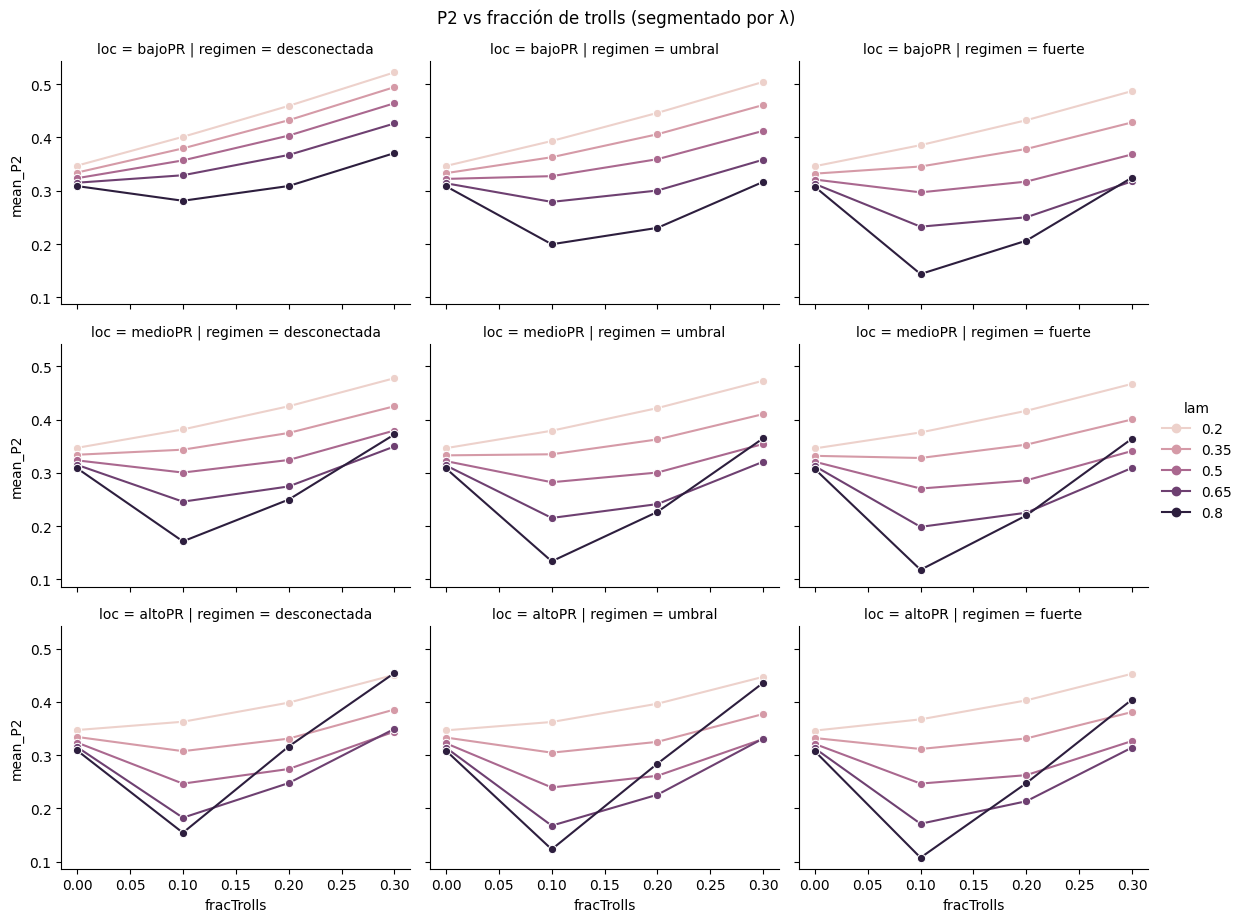

In [192]:
sns.relplot(
    data=df_sel,
    x="fracTrolls",
    y="mean_P2",
    hue="lam",
    col="regimen",
    row="loc",
    kind="line",
    marker="o",
    row_order=["bajoPR", "medioPR", "altoPR"],
    col_order=["desconectada", "umbral", "fuerte"],
    height=3,
    aspect=1.3
)
plt.suptitle("P2 vs fracción de trolls (segmentado por λ)", y=1.02)
plt.show()

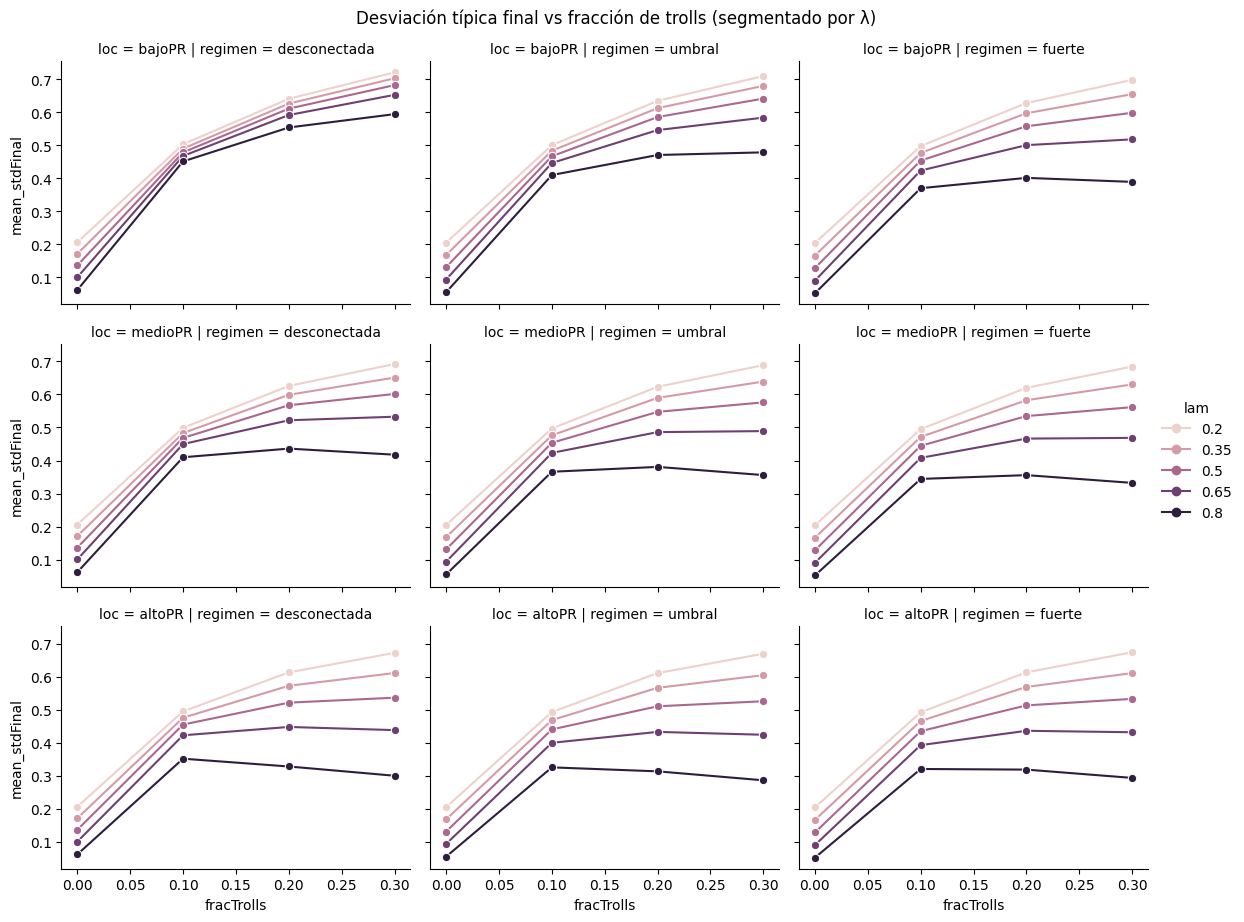

In [197]:
sns.relplot(
    data=df_sel,
    x="fracTrolls",
    y="mean_stdFinal",
    hue="lam",
    col="regimen",
    row="loc",
    kind="line",
    marker="o",
    row_order=["bajoPR", "medioPR", "altoPR"],
    col_order=["desconectada", "umbral", "fuerte"],
    height=3,
    aspect=1.3
)
plt.suptitle("Desviación típica final vs fracción de trolls (segmentado por λ)", y=1.02)
plt.show()

In [156]:
import statsmodels.formula.api as smf
import pandas as pd


df_sel = df_sel.copy()
# Convertir categóricas correctamente
df_sel["regimen"] = df_sel["regimen"].astype("category")
df_sel["loc"] = df_sel["loc"].astype("category")

# Modelo general para NDI
model_NDI = smf.ols(
    "mean_NDI ~ fracTrolls + lam + C(regimen) + C(loc)", data=df_sel
).fit()

print(model_NDI.summary())


                            OLS Regression Results                            
Dep. Variable:               mean_NDI   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     132.3
Date:                Sat, 22 Nov 2025   Prob (F-statistic):           5.99e-62
Time:                        18:38:12   Log-Likelihood:                -880.18
No. Observations:                 180   AIC:                             1774.
Df Residuals:                     173   BIC:                             1797.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept              106.2107 

In [205]:
model_P2 = smf.ols("mean_P2 ~ fracTrolls + lam + C(regimen) + C(loc)", data=df_sel).fit()
model_var = smf.ols("mean_stdFinal ~ fracTrolls + lam + C(regimen) + C(loc)", data=df_sel).fit()
model_rango = smf.ols("mean_rangoFinal ~ fracTrolls + lam + C(regimen) + C(loc)", data=df_sel).fit()
print(model_P2.summary())
print(model_var.summary())
print(model_rango.summary())

                            OLS Regression Results                            
Dep. Variable:                mean_P2   R-squared:                       0.593
Model:                            OLS   Adj. R-squared:                  0.579
Method:                 Least Squares   F-statistic:                     41.97
Date:                Thu, 27 Nov 2025   Prob (F-statistic):           2.45e-31
Time:                        23:11:29   Log-Likelihood:                 285.41
No. Observations:                 180   AIC:                            -556.8
Df Residuals:                     173   BIC:                            -534.5
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                0.4038 

In [208]:
df_sel.columns

Index(['n', 'trolls', 'p', 'lam', 'regimen', 'loc', 'fracTrolls',
       'mean_rho_LW', 'mean_rangoFinal', 'mean_stdFinal', 'mean_convTime',
       'mean_P_norm_vs_trolls', 'std_convTime', 'std_rangoFinal',
       'std_stdFinal', 'prop_isStrongLW', 'mean_nSCC_LW', 'mean_periodLW',
       'prop_isPrimLW', 'mean_nSCC_LW_over_n', 'mean_NDI', 'mean_P2',
       'mean_P4', 'mean_k_needed'],
      dtype='object')

In [211]:
df_agg.columns

Index(['tag', 'n', 'trolls', 'p', 'lam', 'regimen', 'loc', 'fracTrolls',
       'mean_rho_W', 'mean_rho_LW', 'mean_rangoFinal', 'mean_stdFinal',
       'mean_convTime', 'mean_P_norm_vs_trolls', 'mean_propNegNormals',
       'mean_medianFinalNormals', 'mean_resid_fp', 'mean_medianFinal',
       'mean_meanFinal', 'std_convTime', 'std_rangoFinal', 'std_stdFinal',
       'prop_stochastic', 'prop_substochastic', 'prop_isStrongLW',
       'mean_nSCC_W', 'mean_nSCC_LW', 'mean_periodW', 'mean_periodLW',
       'prop_isStrongW', 'prop_isPrimLW', 'mean_nSCC_W_over_n',
       'mean_nSCC_LW_over_n', 'mean_rho_emp_W', 'mean_NDI', 'mean_P2',
       'mean_P4', 'prop_consenso', 'mean_k_needed'],
      dtype='object')

In [213]:

model_mediana = smf.ols("mean_propNegNormals ~ fracTrolls + lam + C(regimen) + C(loc)", data=df_agg).fit()

print(model_mediana.summary())

                             OLS Regression Results                            
Dep. Variable:     mean_propNegNormals   R-squared:                       0.528
Model:                             OLS   Adj. R-squared:                  0.512
Method:                  Least Squares   F-statistic:                     32.29
Date:                 Thu, 27 Nov 2025   Prob (F-statistic):           6.57e-26
Time:                         23:17:06   Log-Likelihood:                 51.017
No. Observations:                  180   AIC:                            -88.03
Df Residuals:                      173   BIC:                            -65.68
Df Model:                            6                                         
Covariance Type:             nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept             

In [214]:

model_mediana = smf.ols("mean_medianFinalNormals ~ fracTrolls + lam + C(regimen) + C(loc)", data=df_agg).fit()

print(model_mediana.summary())

                               OLS Regression Results                              
Dep. Variable:     mean_medianFinalNormals   R-squared:                       0.722
Model:                                 OLS   Adj. R-squared:                  0.712
Method:                      Least Squares   F-statistic:                     74.73
Date:                     Thu, 27 Nov 2025   Prob (F-statistic):           1.88e-45
Time:                             23:17:29   Log-Likelihood:                 120.40
No. Observations:                      180   AIC:                            -226.8
Df Residuals:                          173   BIC:                            -204.4
Df Model:                                6                                         
Covariance Type:                 nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------

In [210]:

model_mediana = smf.ols("mean_convTime ~ fracTrolls + lam + C(regimen) + C(loc)", data=df_sel).fit()

print(model_mediana.summary())

                            OLS Regression Results                            
Dep. Variable:          mean_convTime   R-squared:                       0.676
Model:                            OLS   Adj. R-squared:                  0.665
Method:                 Least Squares   F-statistic:                     60.13
Date:                Thu, 27 Nov 2025   Prob (F-statistic):           8.43e-40
Time:                        23:15:59   Log-Likelihood:                -572.35
No. Observations:                 180   AIC:                             1159.
Df Residuals:                     173   BIC:                             1181.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -5.3994 

# Tablas agregadas de resultados

In [170]:
key_metrics = ["mean_convTime","mean_stdFinal","mean_rangoFinal",'mean_NDI','mean_P2','mean_P4',
               "mean_P_norm_vs_trolls", "mean_propNegNormals", "mean_medianFinal", "mean_meanFinal", "std_stdFinal"]
geometric_metrics = [ 'mean_rho_LW', 'mean_nSCC_LW', "mean_resid_fp"]

In [159]:
"""
        tag', 'n', 'trolls', 'p', 'lam', 'regimen', 'loc', 'fracTrolls',
       'mean_rho_W', 'mean_rho_LW', 'mean_rangoFinal', 'mean_stdFinal',
       'mean_convTime', 'mean_P_norm_vs_trolls', 'mean_propNegNormals',
       'mean_medianFinalNormals', 'mean_resid_fp', 'mean_medianFinal',
       'mean_meanFinal', 'std_convTime', 'std_rangoFinal', 'std_stdFinal',
       'prop_stochastic', 'prop_substochastic', 'prop_isStrongLW',
       'mean_nSCC_W', 'mean_nSCC_LW', 'mean_periodW', 'mean_periodLW',
       'prop_isStrongW', 'prop_isPrimLW', 'mean_nSCC_W_over_n',
       'mean_nSCC_LW_over_n', 'mean_rho_emp_W', 'mean_NDI', 'mean_P2',
       'mean_P4', 'prop_consenso', 'mean_k_needed'
"""

"\n        tag', 'n', 'trolls', 'p', 'lam', 'regimen', 'loc', 'fracTrolls',\n       'mean_rho_W', 'mean_rho_LW', 'mean_rangoFinal', 'mean_stdFinal',\n       'mean_convTime', 'mean_P_norm_vs_trolls', 'mean_propNegNormals',\n       'mean_medianFinalNormals', 'mean_resid_fp', 'mean_medianFinal',\n       'mean_meanFinal', 'std_convTime', 'std_rangoFinal', 'std_stdFinal',\n       'prop_stochastic', 'prop_substochastic', 'prop_isStrongLW',\n       'mean_nSCC_W', 'mean_nSCC_LW', 'mean_periodW', 'mean_periodLW',\n       'prop_isStrongW', 'prop_isPrimLW', 'mean_nSCC_W_over_n',\n       'mean_nSCC_LW_over_n', 'mean_rho_emp_W', 'mean_NDI', 'mean_P2',\n       'mean_P4', 'prop_consenso', 'mean_k_needed'\n"

In [176]:
df_agg.groupby("lam")[key_metrics].mean().round(3)

mean_convTime  mean_stdFinal  mean_rangoFinal  mean_NDI  mean_P2  \
lam                                                                      
0.20          6.638          0.504            1.622   158.094    0.406   
0.35          9.561          0.470            1.528   134.726    0.363   
0.50         13.491          0.430            1.412   110.930    0.322   
0.65         19.371          0.379            1.254    84.800    0.285   
0.80         30.118          0.302            1.005    53.357    0.275   

      mean_P4  mean_P_norm_vs_trolls  mean_propNegNormals  mean_medianFinal  \
lam                                                                           
0.20  174.006                  0.511                0.007             0.444   
0.35  162.547                  0.511                0.022             0.400   
0.50  148.458                  0.511                0.059             0.336   
0.65  132.798                  0.511                0.171             0.239   
0.80  128.332                  0.511                0.425             0.076   

      mean_meanFinal  std_stdFinal  
lam                                 
0.20           0.279         0.003  
0.35           0.239         0.003  
0.50           0.184         0.004  
0.65           0.102         0.005  
0.80          -0.033         0.006

In [177]:
df_agg.groupby("lam")[geometric_metrics].mean().round(3)

mean_rho_LW  mean_nSCC_LW  mean_resid_fp
lam                                           
0.20        0.172        60.981            0.0
0.35        0.302        60.981            0.0
0.50        0.431        60.981            0.0
0.65        0.560        60.981            0.0
0.80        0.689        60.981            0.0

regimen

In [178]:
df_agg["regimen"] = pd.Categorical(
     df_sel["regimen"],
     categories=["desconectada","umbral","fuerte"],
     ordered=True )

df_agg.groupby("regimen")[key_metrics].mean().round(3)

C:\Users\inesm\AppData\Local\Temp\ipykernel_8428\1613954049.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_agg.groupby("regimen")[key_metrics].mean().round(3)


mean_convTime  mean_stdFinal  mean_rangoFinal  mean_NDI  \
regimen                                                                 
desconectada         17.486          0.433            1.441   102.263   
umbral               15.616          0.414            1.362   109.204   
fuerte               14.405          0.403            1.289   113.678   

              mean_P2  mean_P4  mean_P_norm_vs_trolls  mean_propNegNormals  \
regimen                                                                      
desconectada    0.346  155.451                  0.607                0.133   
umbral          0.328  148.338                  0.599                0.137   
fuerte          0.316  143.895                  0.328                0.140   

              mean_medianFinal  mean_meanFinal  std_stdFinal  
regimen                                                       
desconectada             0.314           0.168         0.006  
umbral                   0.296           0.152         0.004  
fuerte                   0.287           0.143         0.003

In [179]:
df_agg.groupby("regimen")[geometric_metrics].mean().round(3)

C:\Users\inesm\AppData\Local\Temp\ipykernel_8428\2973246865.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_agg.groupby("regimen")[geometric_metrics].mean().round(3)


mean_rho_LW  mean_nSCC_LW  mean_resid_fp
regimen                                               
desconectada        0.437        86.520            0.0
umbral              0.429        50.418            0.0
fuerte              0.426        46.003            0.0

In [180]:
df_agg.groupby("trolls")[key_metrics].mean().round(3)


mean_convTime  mean_stdFinal  mean_rangoFinal  mean_NDI  mean_P2  \
trolls                                                                     
0              10.365          0.131            0.565    10.863    0.325   
30             19.722          0.445            1.704   104.238    0.277   
60             17.508          0.530            1.626   149.645    0.323   
90             15.748          0.561            1.561   168.780    0.397   

        mean_P4  mean_P_norm_vs_trolls  mean_propNegNormals  mean_medianFinal  \
trolls                                                                          
0       165.659                    NaN                0.000             0.544   
30      135.982                  0.736                0.059             0.364   
60      139.631                  0.474                0.196             0.211   
90      155.641                  0.323                0.293             0.076   

        mean_meanFinal  std_stdFinal  
trolls                                
0                0.552         0.002  
30               0.237         0.003  
60               0.006         0.005  
90              -0.179         0.006

In [181]:
df_agg.groupby("trolls")[geometric_metrics].mean().round(3)


mean_rho_LW  mean_nSCC_LW  mean_resid_fp
trolls                                          
0             0.500         7.833            0.0
30            0.452        42.813            0.0
60            0.406        78.936            0.0
90            0.365       114.340            0.0

In [182]:
df_agg["loc"] = pd.Categorical(
     df_sel["loc"],
     categories=["bajoPR","medioPR","altoPR"],
     ordered=True )

df_agg.groupby("loc")[key_metrics].mean().round(3)

C:\Users\inesm\AppData\Local\Temp\ipykernel_8428\583773222.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_agg.groupby("loc")[key_metrics].mean().round(3)


mean_convTime  mean_stdFinal  mean_rangoFinal  mean_NDI  mean_P2  \
loc                                                                         
bajoPR          17.474          0.446            1.418   110.179    0.352   
medioPR         16.069          0.415            1.368   111.229    0.325   
altoPR          13.964          0.390            1.306   103.736    0.314   

         mean_P4  mean_P_norm_vs_trolls  mean_propNegNormals  \
loc                                                            
bajoPR   158.491                  0.658                0.051   
medioPR  146.847                  0.495                0.138   
altoPR   142.347                  0.380                0.222   

         mean_medianFinal  mean_meanFinal  std_stdFinal  
loc                                                      
bajoPR              0.385           0.219         0.004  
medioPR             0.291           0.150         0.004  
altoPR              0.220           0.093         0.004

archivos .mat

In [175]:
from pathlib import Path
import re
import numpy as np
import polars as pl

RUNS_DIR = path_runs

# Helpers

def _to_scalar(v):
    a = np.asarray(v)
    return a.item() if a.shape == () or a.size == 1 else v

def _to_float_or_none(v):
    if v is None:
        return None
    x = _to_scalar(v)
    try:
        xf = float(x)
    except Exception:
        return None
    return None if np.isnan(xf) else xf

def _to_int_or_none(v, *, round_before=False):
    xf = _to_float_or_none(v)
    if xf is None:
        return None
    if round_before:
        xf = round(xf)
    return int(xf)

def _to_list_strict(v, dtype=None):
    """Siempre devuelve list (o None). Escalar -> [v]. Array -> list. Vacío -> None."""
    if v is None:
        return None
    a = np.asarray(v)
    if dtype is not None:
        a = a.astype(dtype, copy=False)
    if a.size == 0:
        return None
    if a.ndim == 0:
        return [a.item()]
    return a.tolist()

def _list_int_or_none(v):
    L = _to_list_strict(v)
    if L is None:
        return None
    out = []
    for x in np.asarray(L).ravel():
        try:
            xf = float(x)
            out.append(None if np.isnan(xf) else int(xf))
        except Exception:
            out.append(None)
    return out

def _matlab_idx_to_py(v):
    L = _list_int_or_none(v)
    if L is None:
        return None
    return [None if x is None else x - 1 for x in L]

# -----------------------------
# Carga .mat v7.3
# -----------------------------
def load_out_mat73(path: Path):
    import mat73
    return mat73.loadmat(str(path))["out"]


# Esquema 
LIST_SCHEMA = {
    # time stats / snapshots
    "t": pl.List(pl.Float64),
    "rango_it": pl.List(pl.Float64),
    "mean_it": pl.List(pl.Float64),
    "std_it": pl.List(pl.Float64),
    "q05_it": pl.List(pl.Float64),
    "q50_it": pl.List(pl.Float64),
    "q95_it": pl.List(pl.Float64),
    "tgrid": pl.List(pl.Float64),
    "K_snap": pl.List(pl.Int64),

    # muestras e índices
    "idx_sample": pl.List(pl.Int64),
    "idx_normales": pl.List(pl.Int64),
    "idx_trolls": pl.List(pl.Int64),
    "X_sample": pl.List(pl.List(pl.Float64)),  # m x T
    "z": pl.List(pl.Float64),

}

def _enforce_list_schema(df: pl.DataFrame) -> pl.DataFrame:
    """Asegura que cada columna de LIST_SCHEMA exista y tenga el dtype correcto.
    Rellena Null/None con [] del tipo adecuado."""
    for col, dtype in LIST_SCHEMA.items():
        if col not in df.columns:
            # columna ausente -> columna de listas vacías
            df = df.with_columns(
                pl.Series(name=col, values=[[] for _ in range(df.height)]).cast(dtype, strict=False)
            )
        else:
            # si todo es null o dtype Null -> reemplaza por [] y castea
            if df.get_column(col).dtype == pl.Null:
                df = df.with_columns(
                    pl.Series(name=col, values=[[] for _ in range(df.height)]).cast(dtype, strict=False)
                )
            else:
                # donde haya nulos, pon []
                df = df.with_columns(
                    pl.when(pl.col(col).is_null())
                    .then(pl.lit([]))
                    .otherwise(pl.col(col))
                    .alias(col)
                )
                # castea a la lista esperada (relajado)
                df = df.with_columns(pl.col(col).cast(dtype, strict=False))
    return df


def load_scenario_dir_pl(scen_dir: Path) -> pl.DataFrame:
    rows = []
    files = sorted(scen_dir.glob("rep_*.mat"))
    if not files:
        return pl.DataFrame([])

    for f in files:
        out = load_out_mat73(f)
        rep = int(re.search(r"rep_(\d+)", f.stem, re.I).group(1))

        p    = out["params"]
        fin  = out["final"]
        gra  = out["graph"]
        cen  = out["centrality"]
        ts   = out["time_stats"]
        sn   = out["snapshots"]
        smp  = out["sample"]
        idxs = out.get("indices", {})

        rows.append({
            # Identificación
            "scenario": scen_dir.name,
            "file": str(f),
            "rep": _to_int_or_none(rep),

            # (A) Parámetros del escenario (coinciden con main.m)
            "tag": p["tag"],
            "n": _to_int_or_none(p["n"]),
            "trolls": _to_int_or_none(p["trolls"]),
            "p": _to_float_or_none(p["p"]),
            "lam": _to_float_or_none(p["lam"]),
            "regimen": p["regimen"],
            "loc": p["loc"],
            "fracTrolls": _to_float_or_none(p["fracTrolls"]),

            # (A) Final (agregados) – versión nueva
            "tconv": _to_float_or_none(fin.get("tconv")),
            "resid_fp": _to_float_or_none(fin.get("resid_fp")),
            "consenso": bool(_to_scalar(fin.get("consenso"))),
            "rf": _to_float_or_none(fin.get("rf")),
            "sd": _to_float_or_none(fin.get("sd")),
            "NDI": _to_float_or_none(fin.get("NDI")),
            "P2": _to_float_or_none(fin.get("P2")),
            "P4": _to_float_or_none(fin.get("P4")),

            # (A) opiniones finales / punto fijo
            "z": _to_list_strict(fin.get("z")),
            "x_star": _to_list_strict(fin.get("x_star")),

            # (A) Series / snapshots (listas)
            "t": _to_list_strict(ts.get("t")),
            "rango_it": _to_list_strict(ts.get("rango")),
            "mean_it": _to_list_strict(ts.get("mean")),
            "std_it": _to_list_strict(ts.get("std")),
            "q05_it": _to_list_strict(ts.get("q05")),
            "q50_it": _to_list_strict(ts.get("q50")),
            "q95_it": _to_list_strict(ts.get("q95")),
            "tgrid": _to_list_strict(sn.get("tgrid")),
            "K_snap": _list_int_or_none(sn.get("K_snap")),

            # (A) Muestras / índices
            "idx_sample": _matlab_idx_to_py(smp.get("idx")),
            "X_sample": _to_list_strict(smp.get("X")),
            "idx_normales": _matlab_idx_to_py(idxs.get("normales")),
            "idx_trolls": _matlab_idx_to_py(idxs.get("trolls")),

            # (B) red / geometría
            "isStrongW": bool(_to_scalar(gra.get("isStrongW"))),
            "periodW": _to_int_or_none(gra.get("periodW")),
            "nSCC_W": _to_int_or_none(gra.get("nSCC_W")),
            "isStrongLW": bool(_to_scalar(gra.get("isStrongLW"))),
            "periodLW": _to_int_or_none(gra.get("periodLW")),
            "nSCC_LW": _to_int_or_none(gra.get("nSCC_LW")),
            "isPrimLW": bool(_to_scalar(gra.get("isPrimLW"))),


            # Centralidades agregadas 
            "avgCentTrolls": _to_float_or_none(cen.get("avgCentTrolls")),
            "avgCentNormals": _to_float_or_none(cen.get("avgCentNormals")),
        })

    df = pl.from_dicts(rows)

    # Casteos básicos de escalares 
    df = df.with_columns(
        pl.col(["rep", "n", "trolls", "periodW", "nSCC_W", "periodLW", "nSCC_LW"]).cast(pl.Int64, strict=False),
        pl.col([
            "p", "lam", "fracTrolls",
            "tconv", "resid_fp",
            "rf", "sd", "NDI", "P2", "P4",
            "avgCentTrolls", "avgCentNormals",
        ]).cast(pl.Float64, strict=False),
        pl.col(["consenso", "isStrongW", "isStrongLW", "isPrimLW"]).cast(pl.Boolean, strict=False),
    )

    # **Enforce** de columnas de listas para evitar Null vs List en concat
    df = _enforce_list_schema(df)

    return df.sort(["scenario", "rep"])


# Carga todos los escenarios
def load_all_runs_pl(runs_dir: Path) -> pl.DataFrame:
    dfs = []
    for scen_dir in runs_dir.iterdir():
        if scen_dir.is_dir():
            df = load_scenario_dir_pl(scen_dir)
            if df.height > 0:
                dfs.append(df)
    if not dfs:
        raise FileNotFoundError(f"No hay escenarios bajo {runs_dir}")
    # Ahora todas comparten esquema -> concat seguro
    return pl.concat(dfs, how="vertical").sort(["scenario", "rep"]).with_row_count(name="rowid")



In [ ]:
df = load_all_runs_pl(Path(path_runs))

C:\Users\inesm\AppData\Local\Temp\ipykernel_8428\1984110104.py:234: DeprecationWarning: `DataFrame.with_row_count` is deprecated; use `with_row_index` instead. Note that the default column name has changed from 'row_nr' to 'index'.
  return pl.concat(dfs, how="vertical").sort(["scenario", "rep"]).with_row_count(name="rowid")


In [ ]:
df.select( 'scenario', 'rep','p', 'lam','regimen','loc','fracTrolls','tconv','resid_fp','rf','sd','NDI','P2','P4','z','t','rango_it',
          'mean_it','std_it','q05_it','q50_it','q95_it','tgrid','K_snap','idx_sample','X_sample','idx_normales','idx_trolls','isStrongW',
          'periodW','nSCC_W','isStrongLW','periodLW','nSCC_LW','isPrimLW','avgCentTrolls','avgCentNormals')

shape: (9_000, 37)
┌─────────────────┬─────┬──────────┬─────┬───┬─────────┬──────────┬───────────────┬────────────────┐
│ scenario        ┆ rep ┆ p        ┆ lam ┆ … ┆ nSCC_LW ┆ isPrimLW ┆ avgCentTrolls ┆ avgCentNormals │
│ ---             ┆ --- ┆ ---      ┆ --- ┆   ┆ ---     ┆ ---      ┆ ---           ┆ ---            │
│ str             ┆ i64 ┆ f64      ┆ f64 ┆   ┆ i64     ┆ bool     ┆ f64           ┆ f64            │
╞═════════════════╪═════╪══════════╪═════╪═══╪═════════╪══════════╪═══════════════╪════════════════╡
│ n300_trolls0_de ┆ 1   ┆ 0.009506 ┆ 0.2 ┆ … ┆ 18      ┆ false    ┆ null          ┆ 0.003333       │
│ sconectada_high ┆     ┆          ┆     ┆   ┆         ┆          ┆               ┆                │
│ …               ┆     ┆          ┆     ┆   ┆         ┆          ┆               ┆                │
│ n300_trolls0_de ┆ 2   ┆ 0.009506 ┆ 0.2 ┆ … ┆ 24      ┆ false    ┆ null          ┆ 0.003333       │
│ sconectada_high ┆     ┆          ┆     ┆   ┆         ┆          ┆               ┆                │
│ …               ┆     ┆          ┆     ┆   ┆         ┆          ┆               ┆                │
│ n300_trolls0_de ┆ 3   ┆ 0.009506 ┆ 0.2 ┆ … ┆ 15      ┆ false    ┆ null          ┆ 0.003333       │
│ sconectada_high ┆     ┆          ┆     ┆   ┆         ┆          ┆               ┆                │
│ …               ┆     ┆          ┆     ┆   ┆         ┆          ┆               ┆                │
│ n300_trolls0_de ┆ 4   ┆ 0.009506 ┆ 0.2 ┆ … ┆ 18      ┆ false    ┆ null          ┆ 0.003333       │
│ sconectada_high ┆     ┆          ┆     ┆   ┆         ┆          ┆               ┆                │
│ …               ┆     ┆          ┆     ┆   ┆         ┆          ┆               ┆                │
│ n300_trolls0_de ┆ 5   ┆ 0.009506 ┆ 0.2 ┆ … ┆ 25      ┆ false    ┆ null          ┆ 0.003333       │
│ sconectada_high ┆     ┆          ┆     ┆   ┆         ┆          ┆               ┆                │
│ …               ┆     ┆          ┆     ┆   ┆         ┆          ┆               ┆                │
│ …               ┆ …   ┆ …        ┆ …   ┆ … ┆ …       ┆ …        ┆ …             ┆ …              │
│ n300_trolls90_u ┆ 46  ┆ 0.019013 ┆ 0.8 ┆ … ┆ 96      ┆ false    ┆ 0.003162      ┆ 0.003407       │
│ mbral_mid_lam0. ┆     ┆          ┆     ┆   ┆         ┆          ┆               ┆                │
│ …               ┆     ┆          ┆     ┆   ┆         ┆          ┆               ┆                │
│ n300_trolls90_u ┆ 47  ┆ 0.019013 ┆ 0.8 ┆ … ┆ 95      ┆ false    ┆ 0.003256      ┆ 0.003366       │
│ mbral_mid_lam0. ┆     ┆          ┆     ┆   ┆         ┆          ┆               ┆                │
│ …               ┆     ┆          ┆     ┆   ┆         ┆          ┆               ┆                │
│ n300_trolls90_u ┆ 48  ┆ 0.019013 ┆ 0.8 ┆ … ┆ 97      ┆ false    ┆ 0.003137      ┆ 0.003417       │
│ mbral_mid_lam0. ┆     ┆          ┆     ┆   ┆         ┆          ┆               ┆                │
│ …               ┆     ┆          ┆     ┆   ┆         ┆          ┆               ┆                │
│ n300_trolls90_u ┆ 49  ┆ 0.019013 ┆ 0.8 ┆ … ┆ 98      ┆ false    ┆ 0.003068      ┆ 0.003447       │
│ mbral_mid_lam0. ┆     ┆          ┆     ┆   ┆         ┆          ┆               ┆                │
│ …               ┆     ┆          ┆     ┆   ┆         ┆          ┆               ┆                │
│ n300_trolls90_u ┆ 50  ┆ 0.019013 ┆ 0.8 ┆ … ┆ 99      ┆ false    ┆ 0.003086      ┆ 0.003439       │
│ mbral_mid_lam0. ┆     ┆          ┆     ┆   ┆         ┆          ┆               ┆                │
│ …               ┆     ┆          ┆     ┆   ┆         ┆          ┆               ┆                │
└─────────────────┴─────┴──────────┴─────┴───┴─────────┴──────────┴───────────────┴────────────────┘

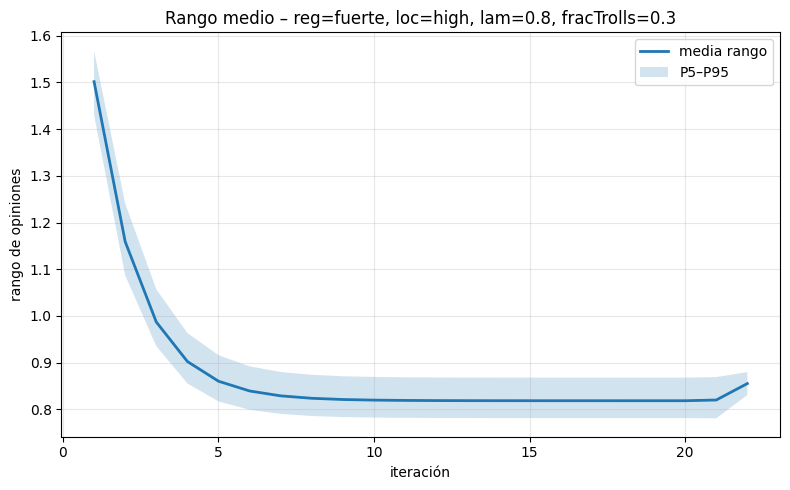

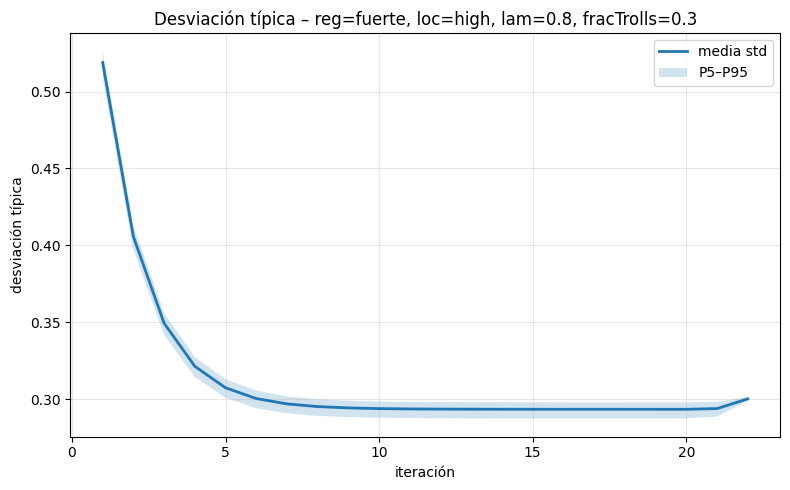

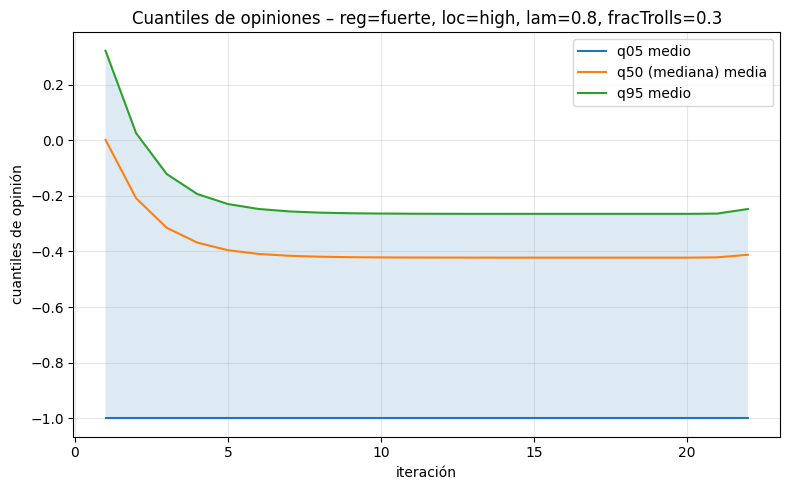

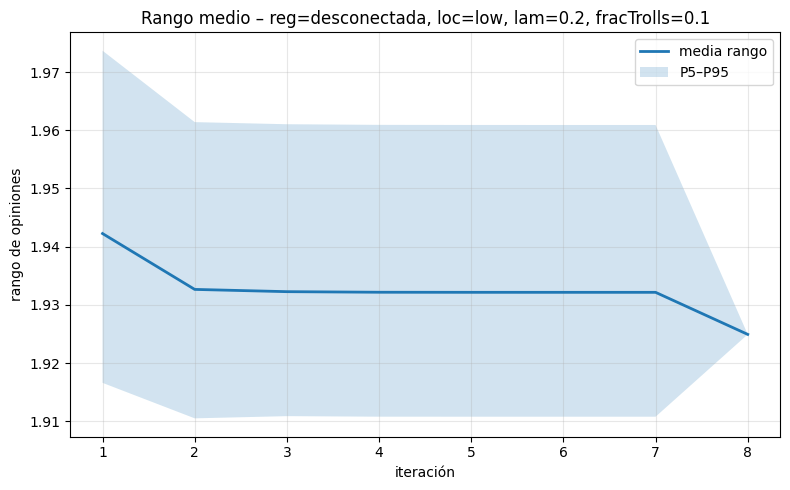

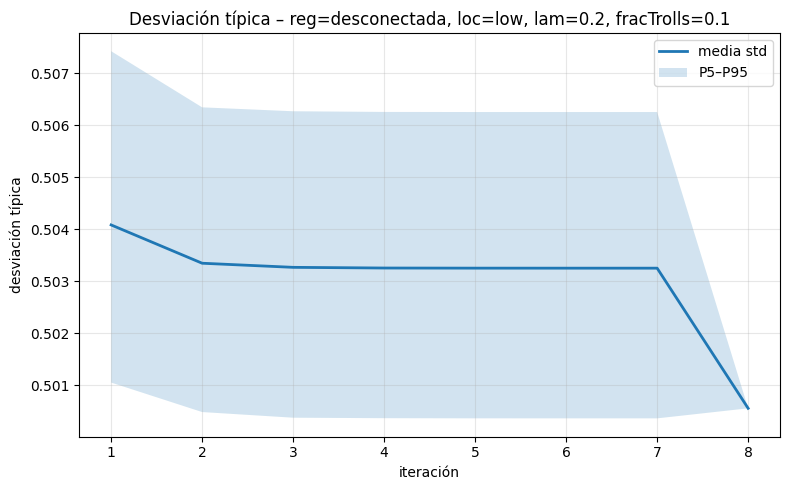

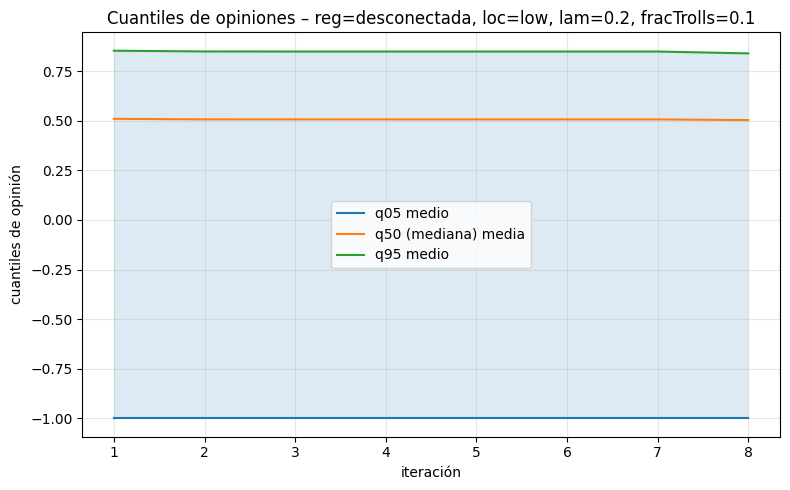

In [ ]:
import numpy as np
import pandas as pd
import polars as pl
import matplotlib.pyplot as plt

#--------------------------------------------------
# Función auxiliar: alinear series de tiempo
#   df_group: DataFrame de polars con varias réplicas
#   value_col: nombre de la columna de lista a agregar (rango_it, std_it, mean_it, etc.)
# Devuelve:
#   all_t: vector de tiempos
#   mean_val: media en cada t
#   p05, p95: percentiles 5 y 95 en cada t
#--------------------------------------------------
def build_aligned_timeseries(df_group: pl.DataFrame, value_col: str):
    pdf = df_group.select(["rep", "t", value_col]).to_pandas()

    frames = []
    for rep, t_list, v_list in zip(pdf["rep"], pdf["t"], pdf[value_col]):
        t_arr = np.asarray(t_list, dtype=float)
        v_arr = np.asarray(v_list, dtype=float)
        s = pd.Series(v_arr, index=t_arr, name=rep)
        frames.append(s)

    # Unión de todos los tiempos
    all_t = np.unique(
        np.concatenate([s.index.values for s in frames])
    )

    # Alinear todas las réplicas sobre la misma rejilla
    Vdf = pd.concat(frames, axis=1).reindex(all_t)

    mean_val = Vdf.mean(axis=1, skipna=True)
    p05 = Vdf.quantile(0.05, axis=1)
    p95 = Vdf.quantile(0.95, axis=1)

    return all_t, mean_val, p05, p95


#--------------------------------------------------
# Función principal:
#   hace 3 figuras agrupadas para un grupo de parámetros:
#   - rango_it
#   - std_it
#   - cuantiles q05_it, q50_it, q95_it (promediados)
#--------------------------------------------------
def plot_group_dynamics(df_runs: pl.DataFrame,
                        regimen: str,
                        loc: str,
                        lam: float,
                        fracTrolls: float):
    # 1) Filtrar el grupo
    df_group = df_runs.filter(
        (pl.col("regimen") == regimen) &
        (pl.col("loc") == loc) &
        (pl.col("lam") == lam) &
        (pl.col("fracTrolls") == fracTrolls)
    )

    if df_group.height == 0:
        print("No hay réplicas con esos parámetros.")
        return

    #------------------------------------------
    # 2) RANGO(t) medio + banda P5–P95
    #------------------------------------------
    all_t, mean_rango, p05_r, p95_r = build_aligned_timeseries(df_group, "rango_it")

    plt.figure(figsize=(8,5))
    plt.plot(all_t, mean_rango, label="media rango", lw=2)
    plt.fill_between(all_t, p05_r, p95_r, alpha=0.2, label="P5–P95")
    plt.xlabel("iteración")
    plt.ylabel("rango de opiniones")
    plt.title(f"Rango medio – reg={regimen}, loc={loc}, lam={lam}, fracTrolls={fracTrolls}")
    plt.legend()
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()

    #------------------------------------------
    # 3) STD(t) medio + banda P5–P95
    #------------------------------------------
    all_t_s, mean_std, p05_s, p95_s = build_aligned_timeseries(df_group, "std_it")

    plt.figure(figsize=(8,5))
    plt.plot(all_t_s, mean_std, label="media std", lw=2)
    plt.fill_between(all_t_s, p05_s, p95_s, alpha=0.2, label="P5–P95")
    plt.xlabel("iteración")
    plt.ylabel("desviación típica")
    plt.title(f"Desviación típica – reg={regimen}, loc={loc}, lam={lam}, fracTrolls={fracTrolls}")
    plt.legend()
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()

    #------------------------------------------
    # 4) Cuantiles q05, q50, q95 (promedios entre réplicas)
    #   Aquí, en vez de percentiles entre réplicas,
    #   calculamos la media de cada cuantíl por tiempo.
    #------------------------------------------
    pdf_q = df_group.select(["rep", "t", "q05_it", "q50_it", "q95_it"]).to_pandas()

    frames_q05, frames_q50, frames_q95 = [], [], []

    for rep, t_list, q05_list, q50_list, q95_list in zip(
        pdf_q["rep"], pdf_q["t"], pdf_q["q05_it"], pdf_q["q50_it"], pdf_q["q95_it"]
    ):
        t_arr = np.asarray(t_list, dtype=float)
        q05_arr = np.asarray(q05_list, dtype=float)
        q50_arr = np.asarray(q50_list, dtype=float)
        q95_arr = np.asarray(q95_list, dtype=float)

        frames_q05.append(pd.Series(q05_arr, index=t_arr, name=rep))
        frames_q50.append(pd.Series(q50_arr, index=t_arr, name=rep))
        frames_q95.append(pd.Series(q95_arr, index=t_arr, name=rep))

    all_t_q = np.unique(
        np.concatenate([s.index.values for s in frames_q05])
    )

    Q05df = pd.concat(frames_q05, axis=1).reindex(all_t_q)
    Q50df = pd.concat(frames_q50, axis=1).reindex(all_t_q)
    Q95df = pd.concat(frames_q95, axis=1).reindex(all_t_q)

    mean_q05 = Q05df.mean(axis=1, skipna=True)
    mean_q50 = Q50df.mean(axis=1, skipna=True)
    mean_q95 = Q95df.mean(axis=1, skipna=True)

    plt.figure(figsize=(8,5))
    plt.plot(all_t_q, mean_q05, label="q05 medio")
    plt.plot(all_t_q, mean_q50, label="q50 (mediana) media")
    plt.plot(all_t_q, mean_q95, label="q95 medio")
    plt.fill_between(all_t_q, mean_q05, mean_q95, alpha=0.15)
    plt.xlabel("iteración")
    plt.ylabel("cuantiles de opinión")
    plt.title(f"Cuantiles de opiniones – reg={regimen}, loc={loc}, lam={lam}, fracTrolls={fracTrolls}")
    plt.legend()
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()


#--------------------------------------------------
# EJEMPLO DE USO (ajusta los valores a los que tengas):
#--------------------------------------------------

# df_runs = load_all_runs_pl(RUNS_DIR)  # ya lo tienes de antes

plot_group_dynamics(
    df,
    regimen="fuerte",
    loc="high",
    lam=0.8,
    fracTrolls=0.3
)
plot_group_dynamics(
    df,
    regimen="desconectada",
    loc="low",
    lam=0.2,
    fracTrolls=0.1
)


In [ ]:
import numpy as np
import polars as pl
import matplotlib.pyplot as plt

def _to_1d_float_list(lst):
    if lst is None:
        return []
    out = []
    for v in lst:
        try:
            out.append(float(v))
        except Exception:
            out.append(np.nan)
    arr = np.asarray(out, dtype=float)
    if arr.size and np.isnan(arr).any():
        x = np.arange(arr.size)
        m = ~np.isnan(arr)
        if m.sum() >= 2:
            arr[~m] = np.interp(x[~m], x[m], arr[m])
        else:
            arr = arr[m]
    return arr.tolist()

def _resample_1d(lst, S=12):
    arr = np.asarray(_to_1d_float_list(lst), dtype=float)
    if arr.size < 2:
        return np.full(S, np.nan)
    x  = np.linspace(0, 1, arr.size)
    xo = np.linspace(0, 1, S)
    return np.interp(xo, x, arr)

def plot_opinion_dist_grid_from_pl(DF_pl: pl.DataFrame, regimen: str, loc: str, S: int = 12, agg: str = "median"):
    """
    Facetas: filas = fracTrolls, columnas = λ.
    En cada panel: banda P5–P95 + línea mediana (o media) de la distribución temporal.
    Usa q05_it/q50_it/q95_it si existen; si no, fallback a mean_it ± 1.64·std_it.
    """
    norm_reg = regimen.lower()
    norm_loc = loc.lower()

    # Filtrado robusto en polars (to_lowercase + strip_chars)
    sub = DF_pl.filter(
        (pl.col("regimen").cast(pl.Utf8).str.to_lowercase().str.strip_chars() == norm_reg) &
        (pl.col("loc").cast(pl.Utf8).str.to_lowercase().str.strip_chars() == norm_loc)
    )
    if sub.height == 0:
        print("No hay datos para ese régimen/loc")
        return

    fracs = sorted(sub.select("fracTrolls").unique().to_series().to_list())
    lams  = sorted(sub.select("lam").unique().to_series().to_list())

    fig, axes = plt.subplots(len(fracs), len(lams),
                             figsize=(3.2*len(lams), 2.6*len(fracs)),
                             sharex=True, sharey=True)
    if len(fracs) == 1 and len(lams) == 1:
        axes = np.array([[axes]])
    else:
        axes = np.atleast_2d(axes)

    for i, f in enumerate(fracs):
        for j, l in enumerate(lams):
            ax = axes[i, j]
            grp = sub.filter((pl.col("fracTrolls") == f) & (pl.col("lam") == l))
            if grp.height == 0:
                ax.axis("off"); 
                continue

            # Extrae listas por réplica (polars -> listas Python)
            q05_list = grp.select("q05_it").to_series().to_list() if "q05_it" in grp.columns else [None]*grp.height
            q50_list = grp.select("q50_it").to_series().to_list() if "q50_it" in grp.columns else [None]*grp.height
            q95_list = grp.select("q95_it").to_series().to_list() if "q95_it" in grp.columns else [None]*grp.height
            mu_list  = grp.select("mean_it").to_series().to_list() if "mean_it" in grp.columns else [None]*grp.height
            sd_list  = grp.select("std_it").to_series().to_list()  if "std_it"  in grp.columns else [None]*grp.height

            P5s, P50s, P95s = [], [], []
            for q05, q50, q95, mu, sd in zip(q05_list, q50_list, q95_list, mu_list, sd_list):
                # usa percentiles si están; si no, fallback a media±1.64·std
                if q05 and q95:
                    p5  = _resample_1d(q05, S)
                    p95 = _resample_1d(q95, S)
                    p50 = _resample_1d(q50, S) if q50 else np.nanmean(np.vstack([p5, p95]), axis=0)
                elif mu and sd:
                    mu_r = _resample_1d(mu, S)
                    sd_r = _resample_1d(sd, S)
                    p5   = mu_r - 1.64*sd_r
                    p95  = mu_r + 1.64*sd_r
                    p50  = mu_r
                else:
                    continue
                P5s.append(p5); P50s.append(p50); P95s.append(p95)

            if not P50s:
                ax.text(0.5, 0.5, "(sin datos)", ha="center", va="center")
                ax.set_axis_off()
                continue

            P5  = np.vstack(P5s)
            P50 = np.vstack(P50s)
            P95 = np.vstack(P95s)

            if agg == "median":
                m5, m50, m95 = np.nanmedian(P5, 0), np.nanmedian(P50, 0), np.nanmedian(P95, 0)
            else:
                m5, m50, m95 = np.nanmean(P5, 0),   np.nanmean(P50, 0),   np.nanmean(P95, 0)

            x = np.linspace(0, 1, S)
            ax.fill_between(x, m5, m95, alpha=0.20)   # banda P5–P95
            ax.plot(x, m50, linewidth=1.8)           # mediana

            if i == len(fracs)-1: ax.set_xlabel("posición de snapshot")
            if j == 0:            ax.set_ylabel(f"trolls={f:.2f}\nopinión")
            if i == 0:            ax.set_title(f"λ={l:.2f}")

            y_min = np.nanmin([m5.min(), m50.min(), m95.min()]) if np.isfinite(m50).any() else -1
            y_max = np.nanmax([m5.max(), m50.max(), m95.max()]) if np.isfinite(m50).any() else 1
            if not np.isfinite(y_min) or not np.isfinite(y_max):
                y_min, y_max = -1, 1
            pad = 0.05 * (y_max - y_min if y_max > y_min else 1)
            ax.set_ylim(y_min - pad, y_max + pad)
            ax.grid(alpha=0.15, linewidth=0.5)

    fig.suptitle(f"Distribución de opiniones — régimen={regimen}, loc={loc}", y=1.02)
    plt.tight_layout()
    plt.show()


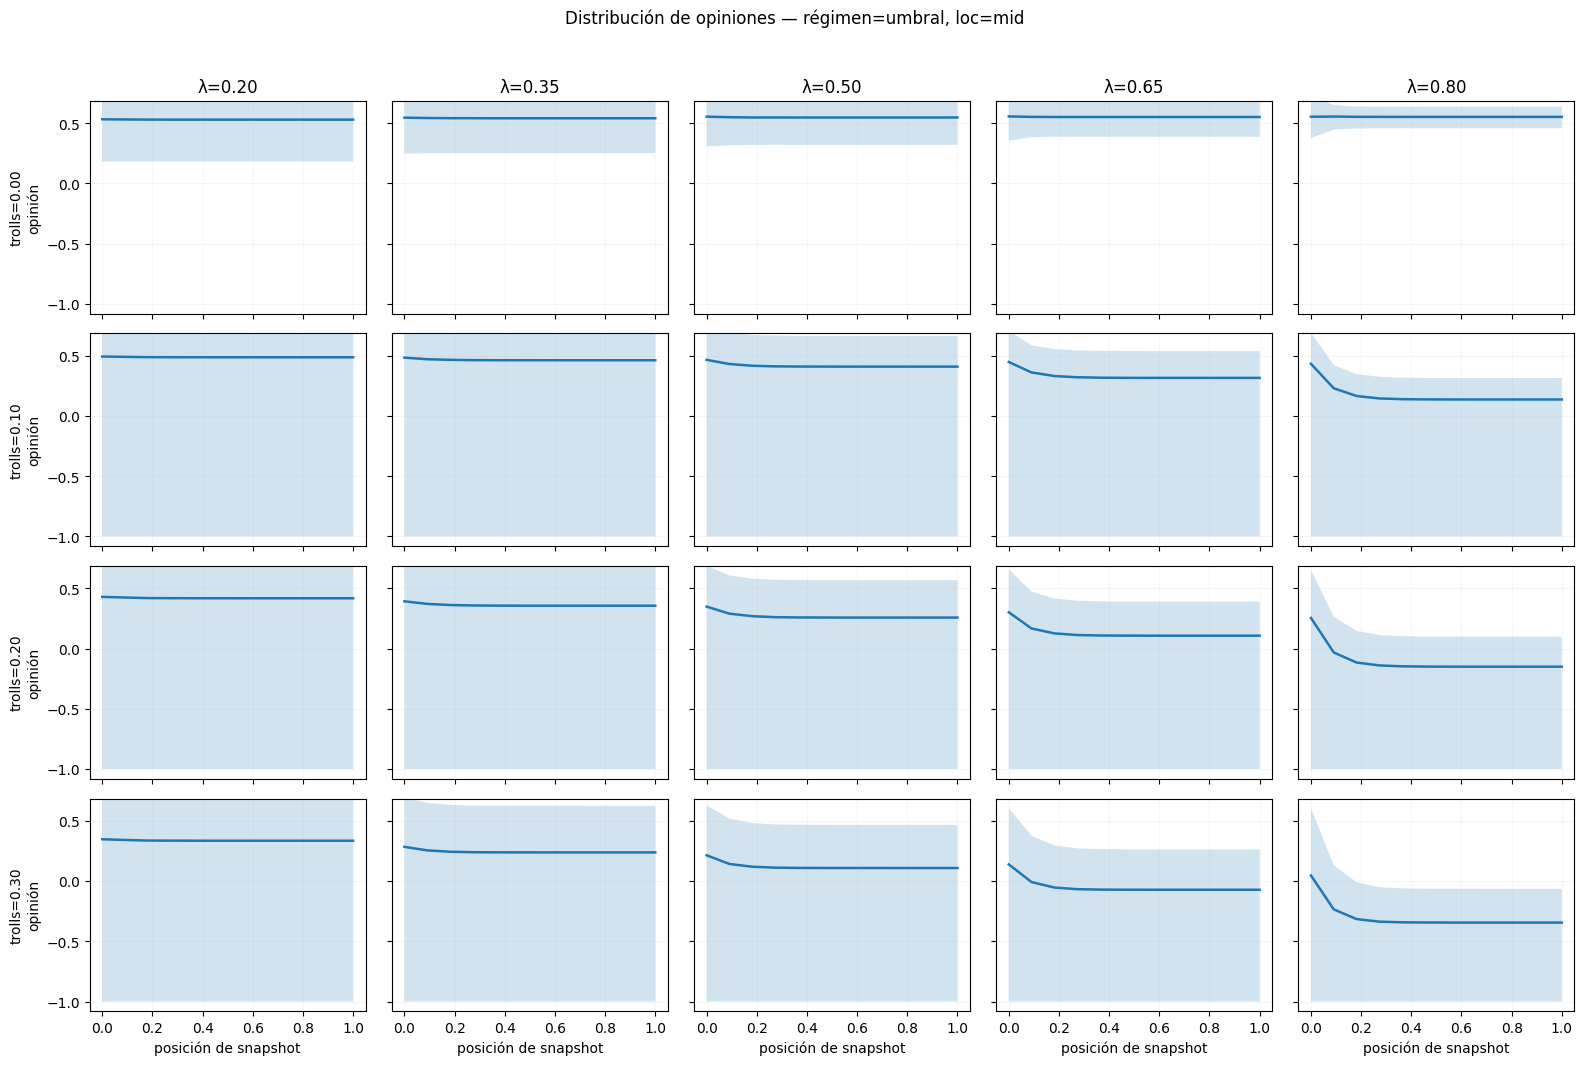

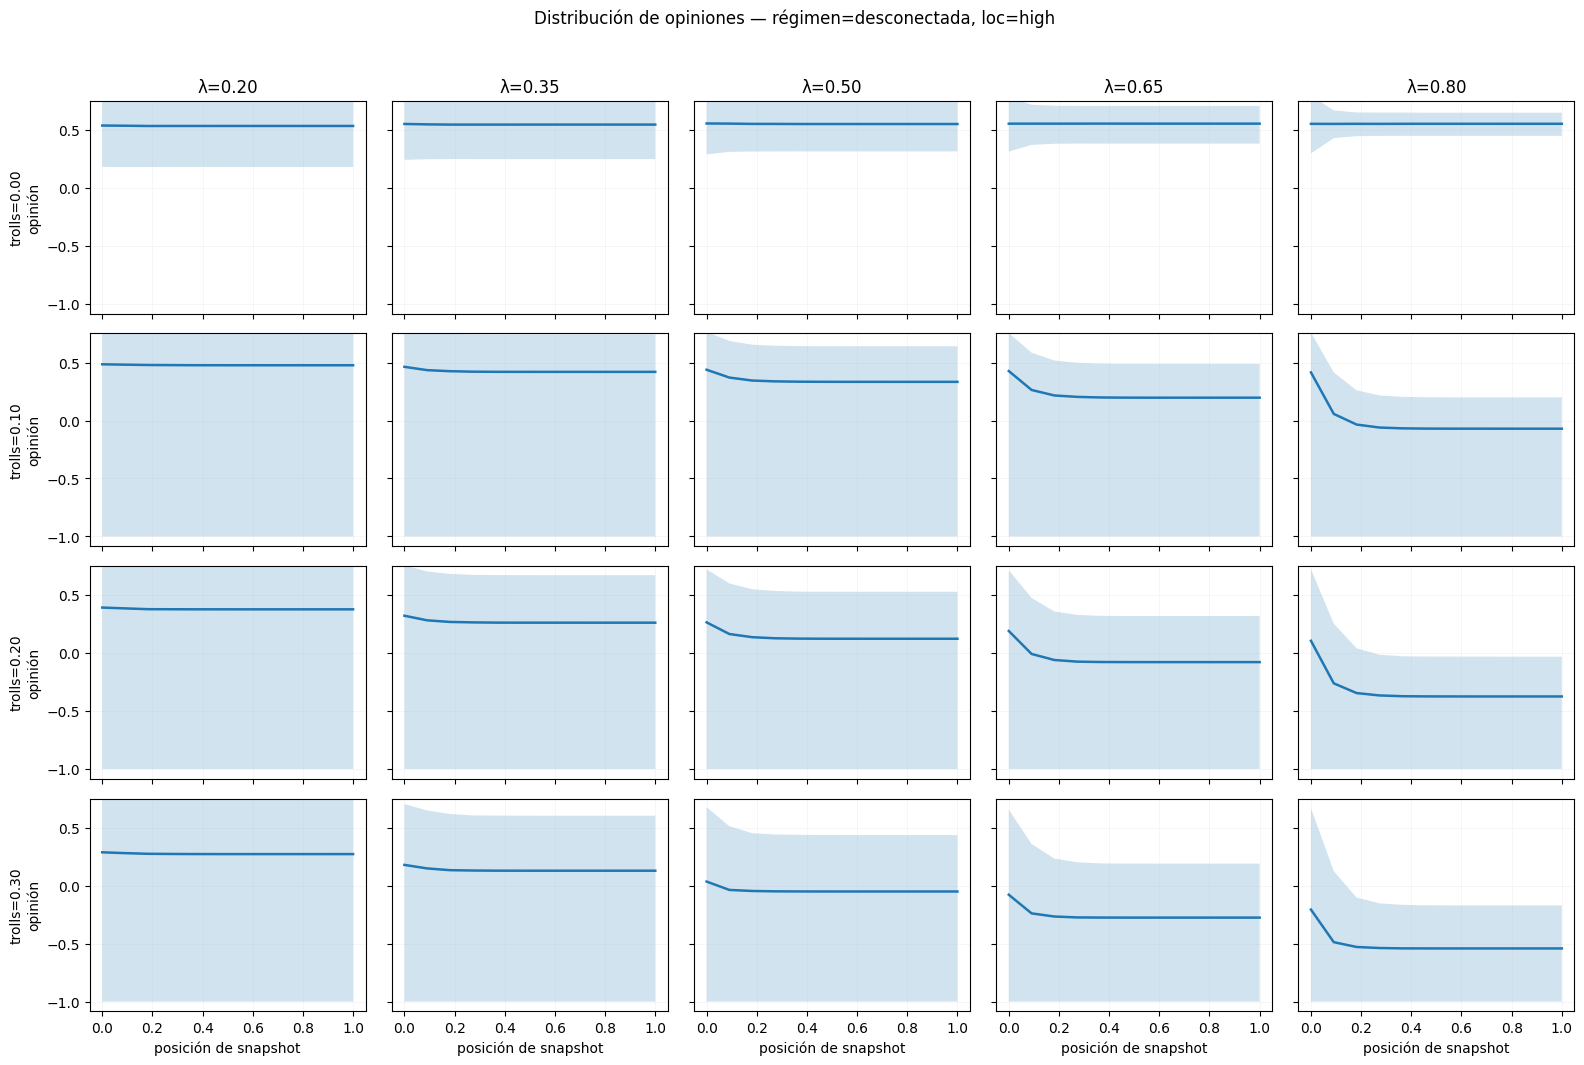

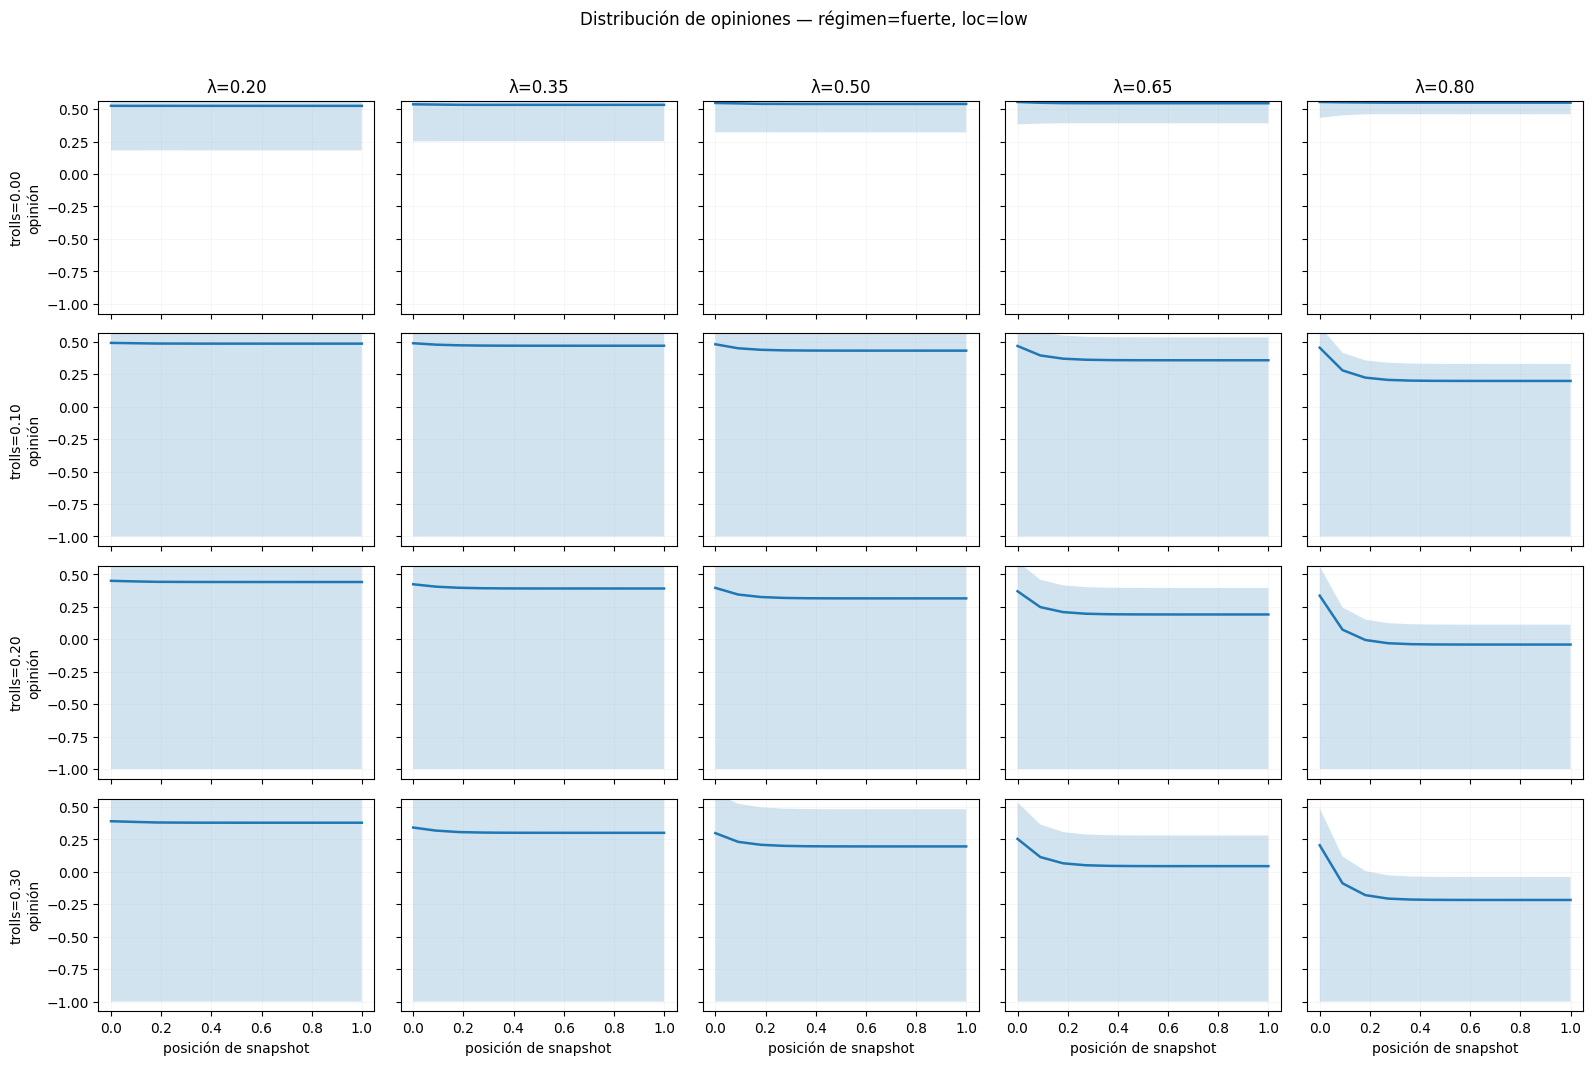

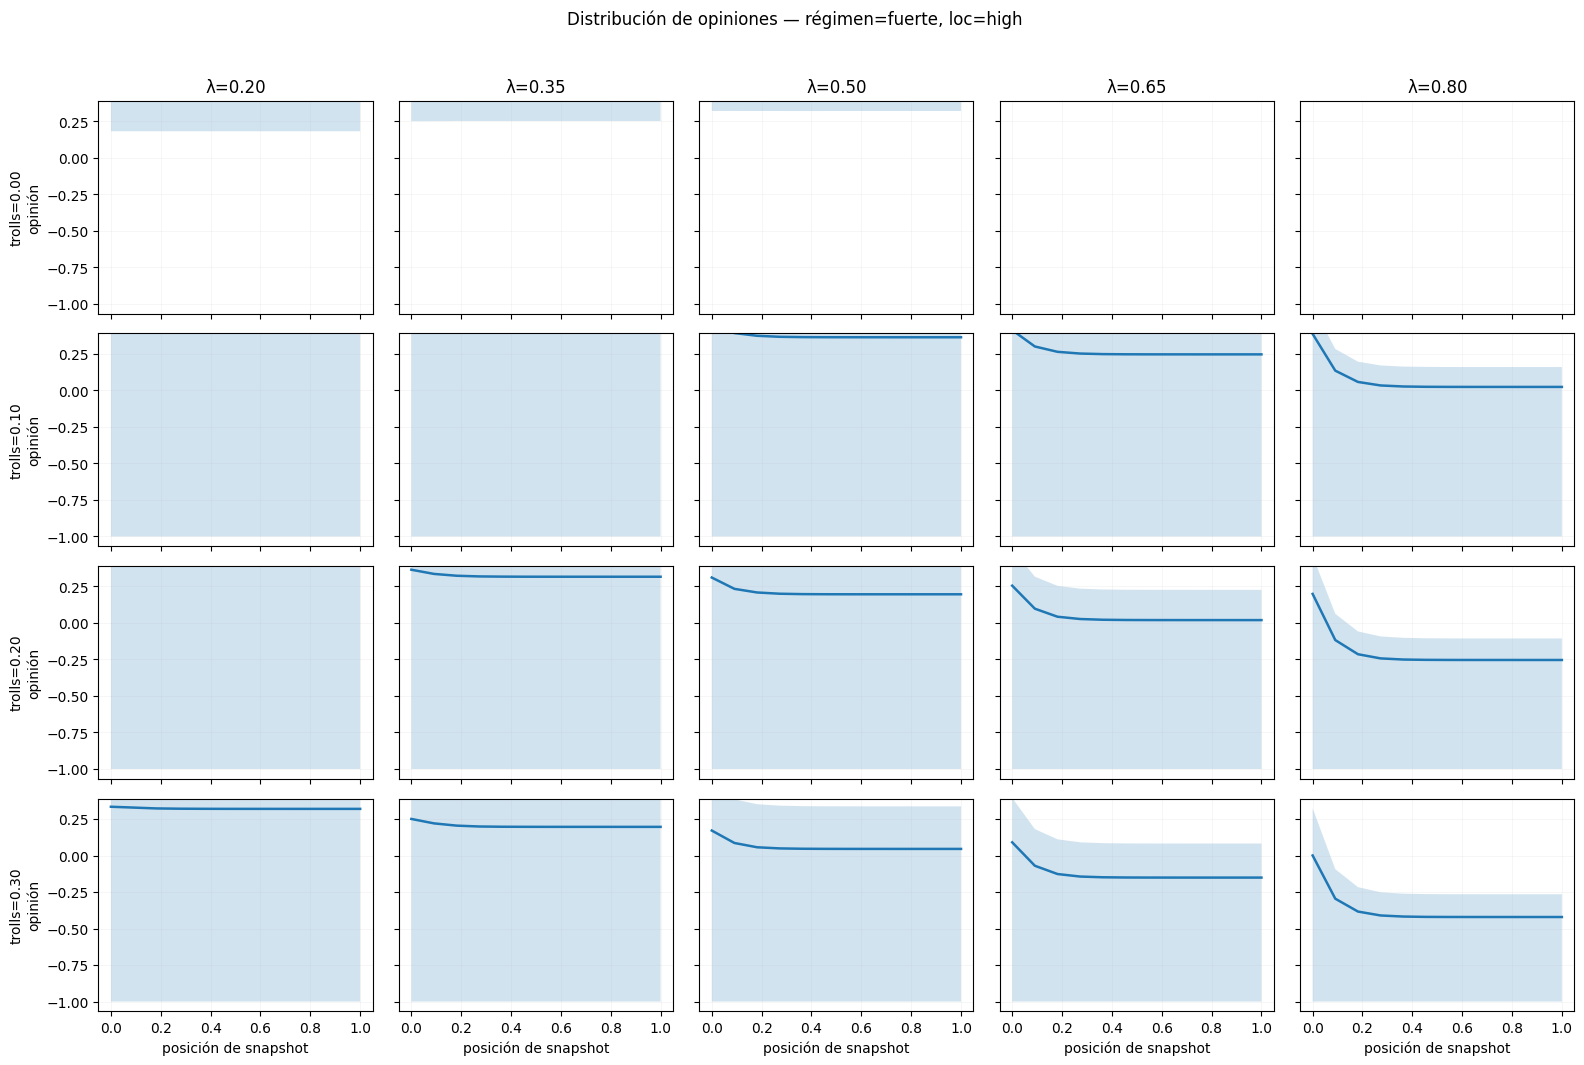

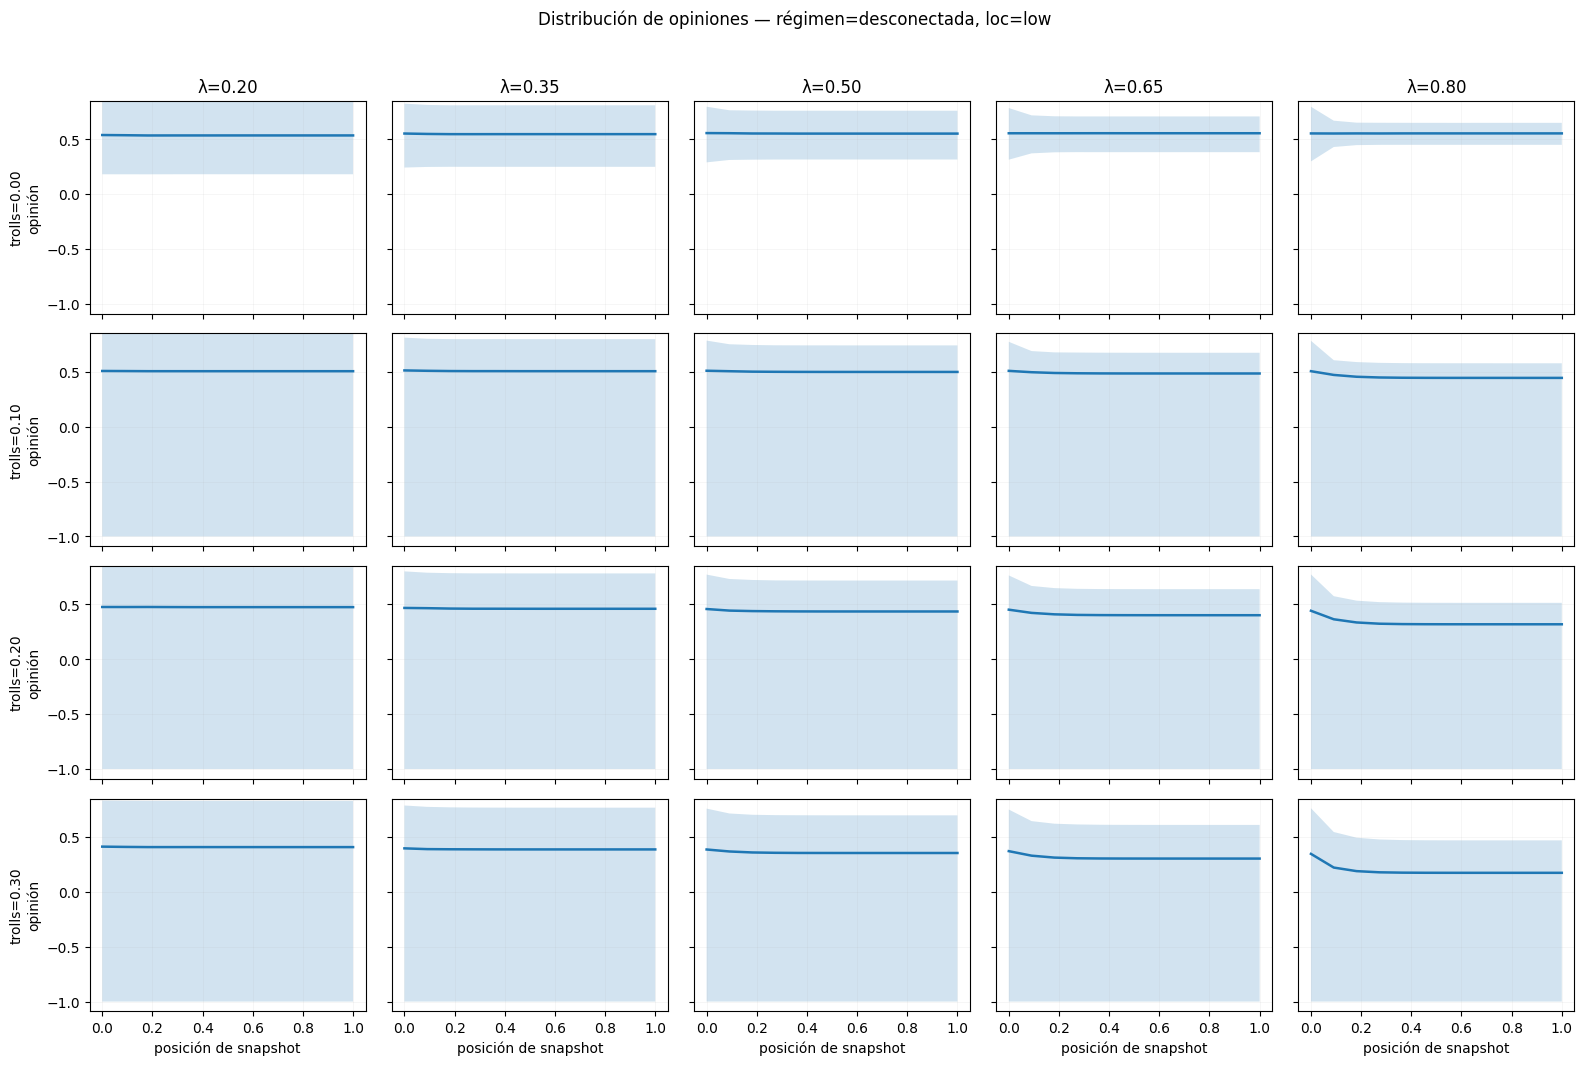

In [ ]:
plot_opinion_dist_grid_from_pl(df, regimen="umbral", loc="mid", S=12, agg="median")
# Otros:
plot_opinion_dist_grid_from_pl(df, "desconectada", "high")
plot_opinion_dist_grid_from_pl(df, "fuerte", "low")
plot_opinion_dist_grid_from_pl(df, "fuerte", "high")
plot_opinion_dist_grid_from_pl(df, "desconectada", "low")


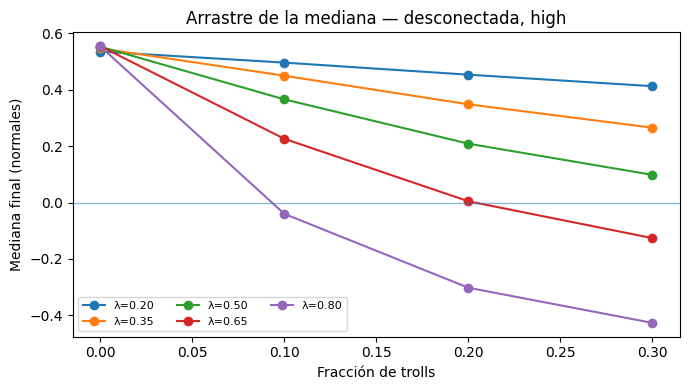

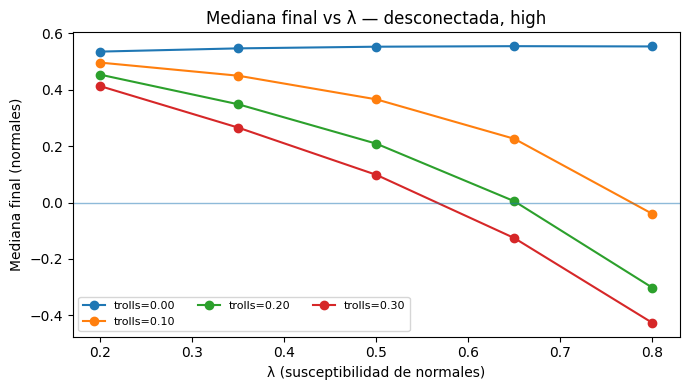

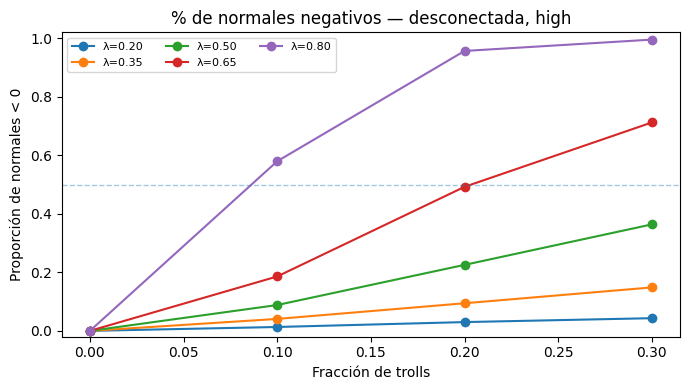

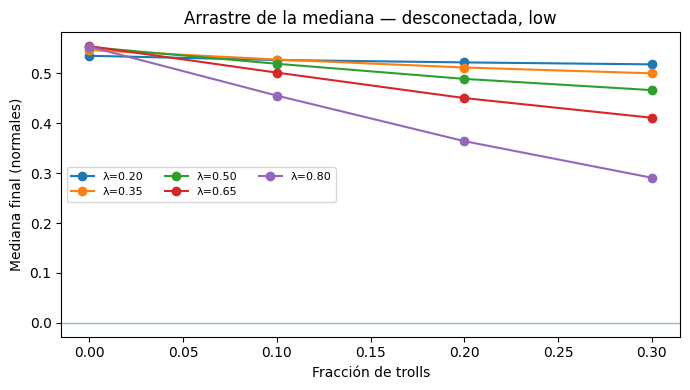

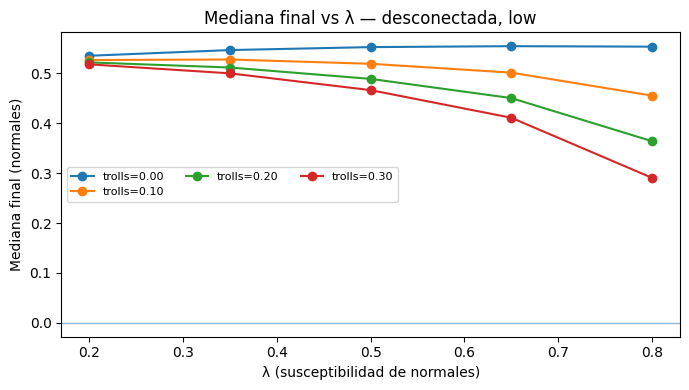

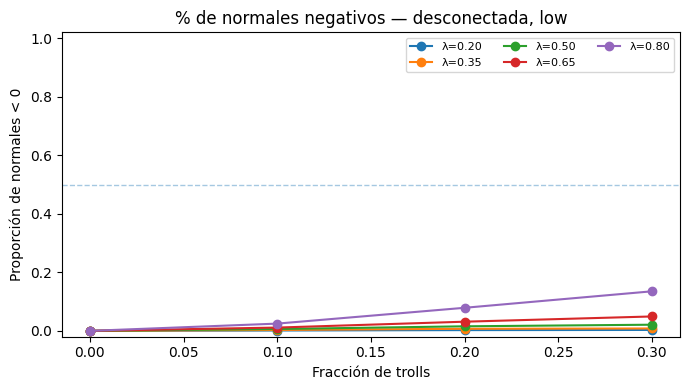

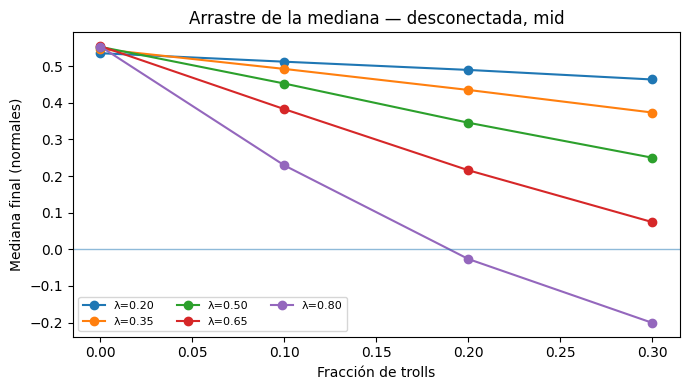

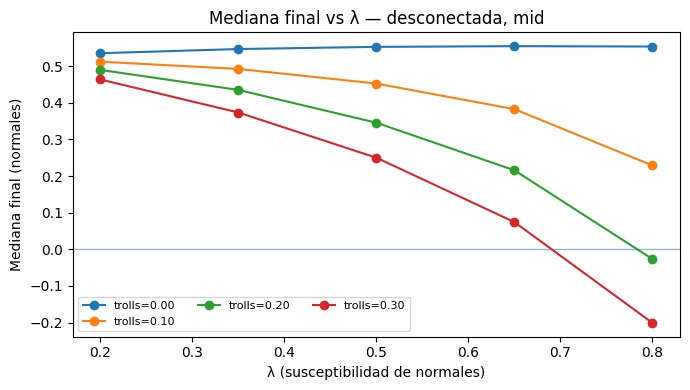

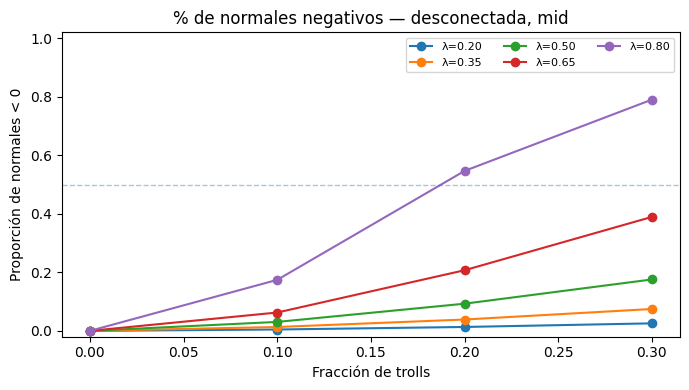

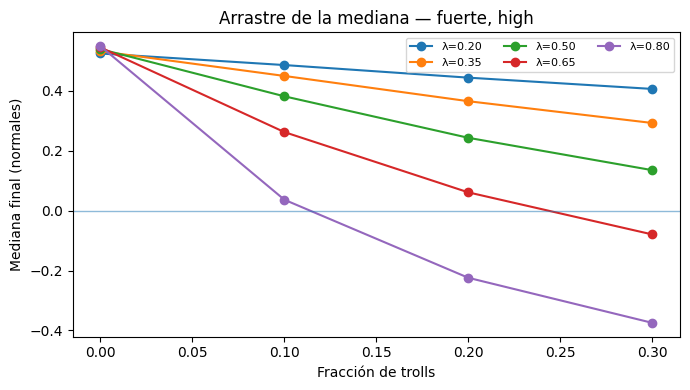

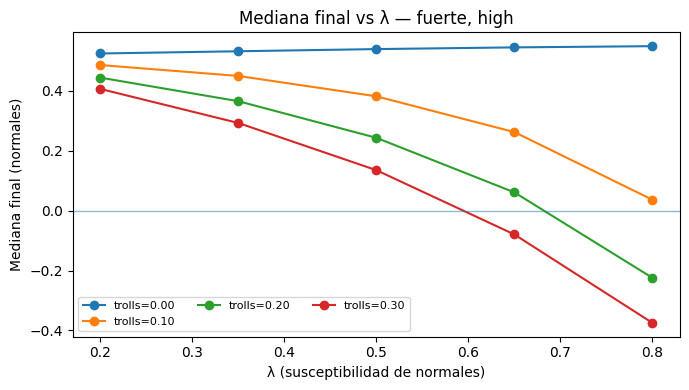

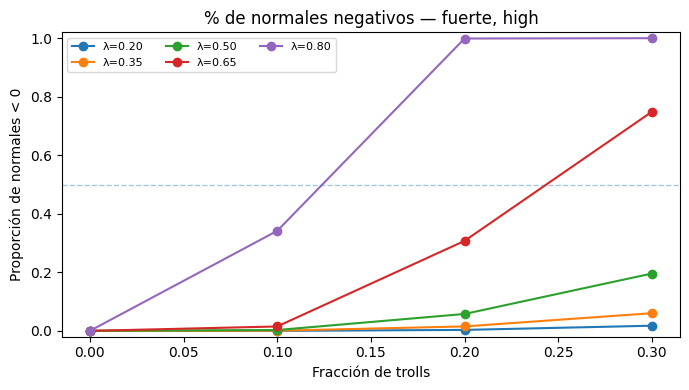

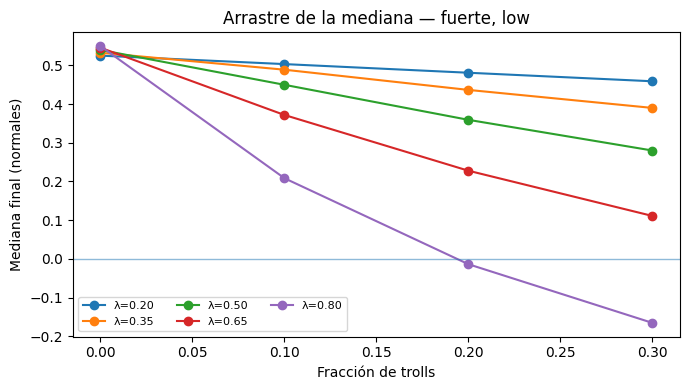

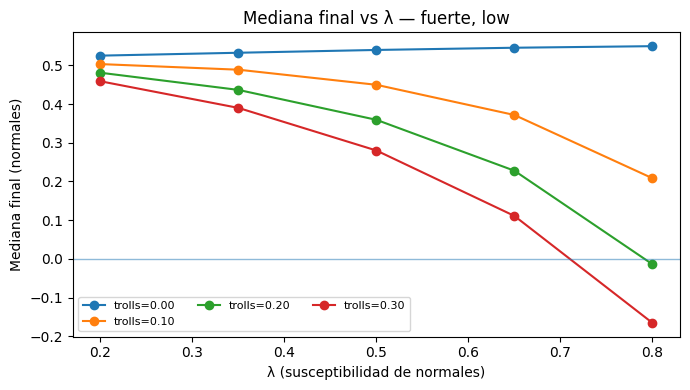

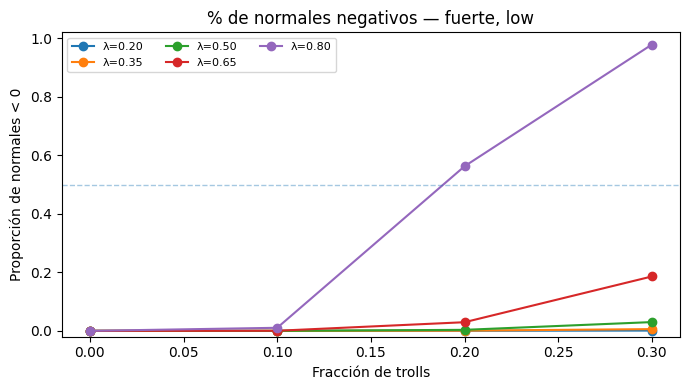

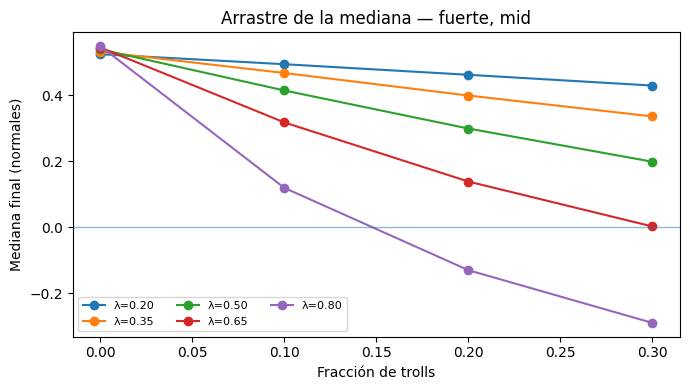

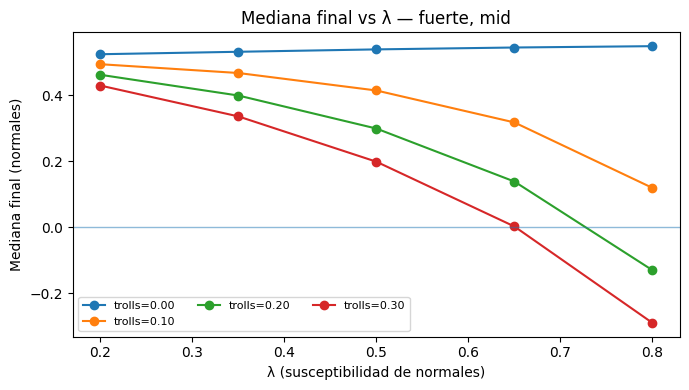

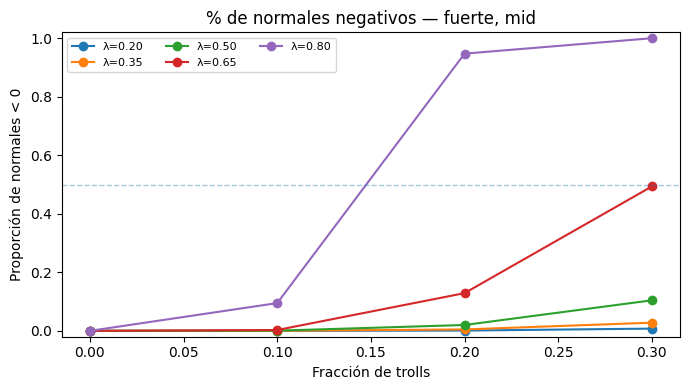

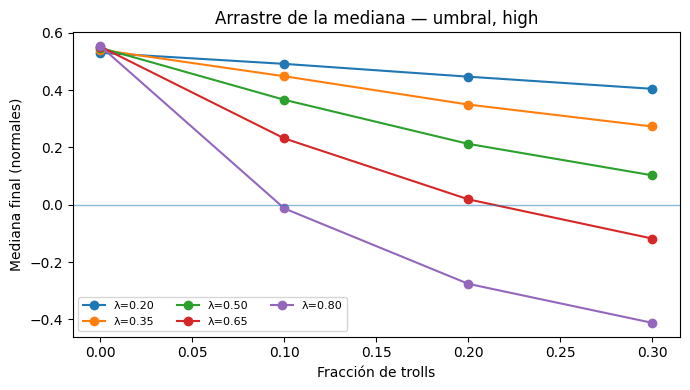

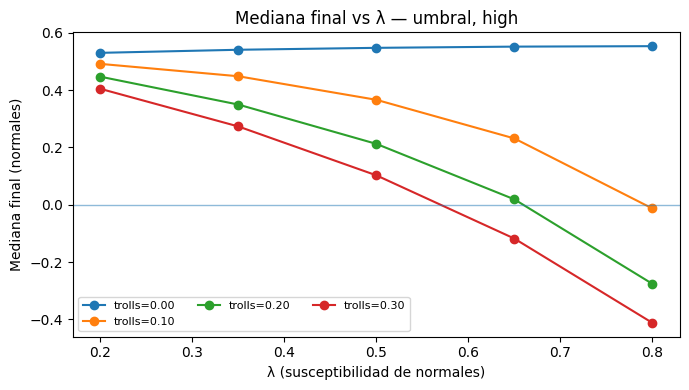

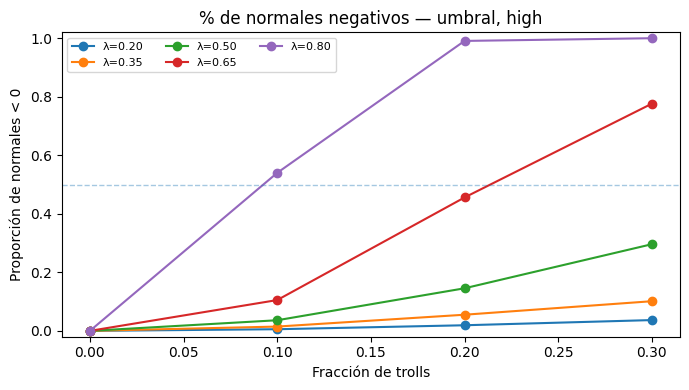

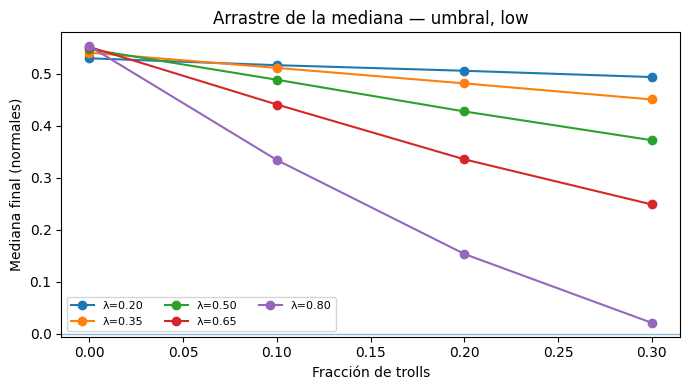

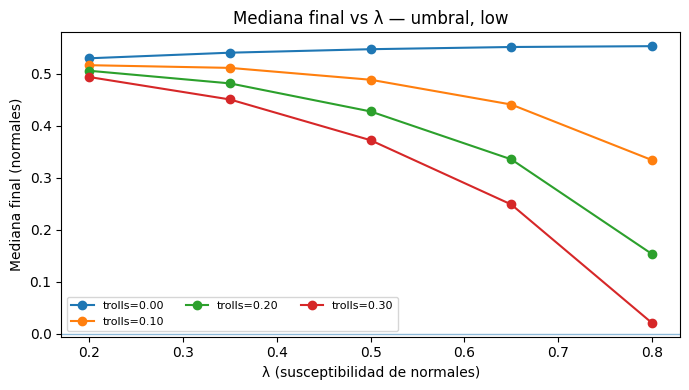

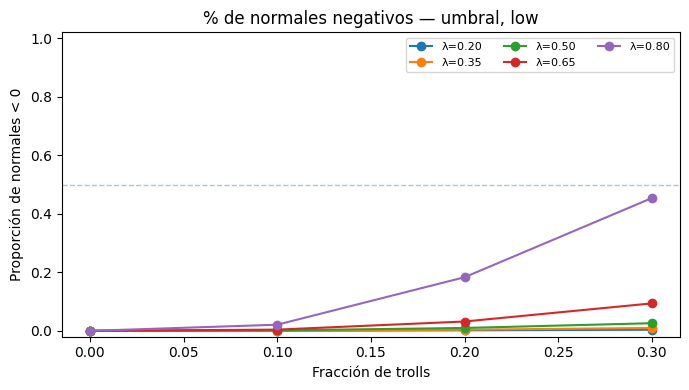

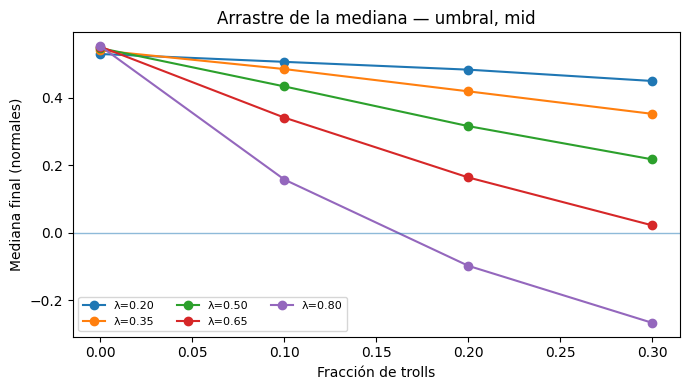

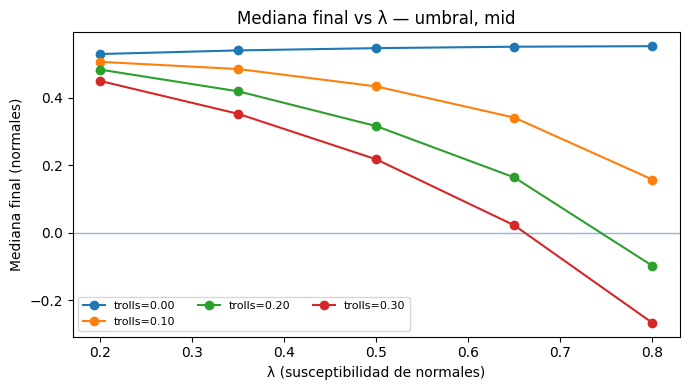

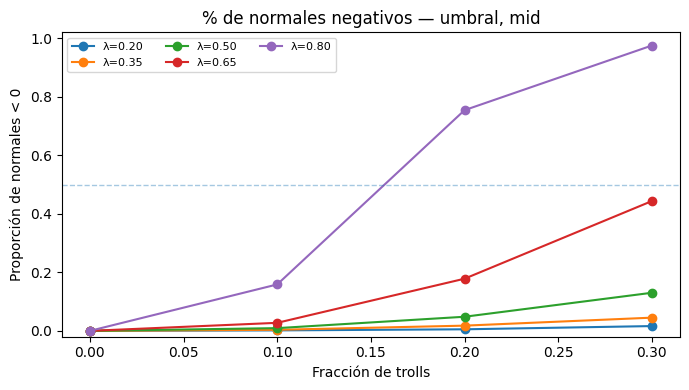

In [ ]:
import numpy as np
import polars as pl
import matplotlib.pyplot as plt

# --- helpers de antes (mínimos) ---
def _np1d(x):
    a = np.asarray(x, dtype=float).ravel()
    return a[~np.isnan(a)]

def _final_normals(z_list):
    z = _np1d(z_list)
    return z[z > -0.999]  # excluye trolls (= -1 exacto)

def _agg_replicas(arrs, func=np.mean):
    vals = [func(a) for a in arrs if a.size]
    return float(np.mean(vals)) if vals else np.nan

def _final_table(DF_pl, regimen, loc):
    sub = DF_pl.filter(
        (pl.col("regimen").cast(pl.Utf8).str.to_lowercase().str.strip_chars()==regimen.lower()) &
        (pl.col("loc").cast(pl.Utf8).str.to_lowercase().str.strip_chars()==loc.lower())
    )
    rows = []
    for f in sorted(sub.select("fracTrolls").unique().to_series().to_list()):
        for l in sorted(sub.select("lam").unique().to_series().to_list()):
            grp = sub.filter((pl.col("fracTrolls")==f) & (pl.col("lam")==l))
            if grp.height==0: 
                continue
            finals = []
            for z_list in grp.select("z").to_series().to_list():
                zn = _final_normals(z_list)
                if zn.size: finals.append(zn)
            if not finals:
                rows.append({"fracTrolls":f,"lam":l,"mediana":np.nan,"media":np.nan,"std":np.nan,
                             "share_neg":np.nan,"q25":np.nan,"q75":np.nan})
                continue
            rows.append({
                "fracTrolls": f,
                "lam": l,
                "mediana":   _agg_replicas(finals, np.median),
                "media":     _agg_replicas(finals, np.mean),
                "std":       _agg_replicas(finals, np.std),
                "share_neg": _agg_replicas(finals, lambda a: (a<0).mean()),
                "q25":       _agg_replicas(finals, lambda a: np.quantile(a, 0.25)),
                "q75":       _agg_replicas(finals, lambda a: np.quantile(a, 0.75)),
            })
    return pl.DataFrame(rows).sort(["fracTrolls","lam"])

# --- 4 plots compactos para un (regimen, loc) ---
def _plots_for_pair(DF_pl, regimen, loc):
    T = _final_table(DF_pl, regimen, loc).to_pandas()
    if T.empty:
        print(f"(sin datos) {regimen} / {loc}")
        return
    
    # 1) Mediana vs trolls (una curva por λ)
    plt.figure(figsize=(7,4))
    for lam, g in T.groupby("lam"):
        g = g.sort_values("fracTrolls")
        plt.plot(g["fracTrolls"], g["mediana"], marker="o", label=f"λ={lam:.2f}")
    plt.axhline(0, lw=1, alpha=0.5)
    plt.xlabel("Fracción de trolls"); plt.ylabel("Mediana final (normales)")
    plt.title(f"Arrastre de la mediana — {regimen}, {loc}")
    plt.legend(ncol=3, fontsize=8); plt.tight_layout(); plt.show()

    # 2) Mediana vs λ (una curva por fracción de trolls)
    plt.figure(figsize=(7,4))
    for f, g in T.groupby("fracTrolls"):
        g = g.sort_values("lam")
        plt.plot(g["lam"], g["mediana"], marker="o", label=f"trolls={f:.2f}")
    plt.axhline(0, lw=1, alpha=0.5)
    plt.xlabel("λ (susceptibilidad de normales)"); plt.ylabel("Mediana final (normales)")
    plt.title(f"Mediana final vs λ — {regimen}, {loc}")
    plt.legend(ncol=3, fontsize=8); plt.tight_layout(); plt.show()

    # 3) % de normales negativos vs trolls (una curva por λ)
    plt.figure(figsize=(7,4))
    for lam, g in T.groupby("lam"):
        g = g.sort_values("fracTrolls")
        plt.plot(g["fracTrolls"], g["share_neg"], marker="o", label=f"λ={lam:.2f}")
    plt.ylim(-0.02, 1.02); plt.axhline(0.5, ls="--", lw=1, alpha=0.4)
    plt.xlabel("Fracción de trolls"); plt.ylabel("Proporción de normales < 0")
    plt.title(f"% de normales negativos — {regimen}, {loc}")
    plt.legend(ncol=3, fontsize=8); plt.tight_layout(); plt.show()

    

# todas las combinaciones regimen × loc ---
def plot_all_pairs(DF_pl):
    regs = DF_pl.select("regimen").unique().to_series().to_list()
    locs = DF_pl.select("loc").unique().to_series().to_list()
    for reg in sorted(regs):
        for loc in sorted(locs):
            _plots_for_pair(DF_pl, reg, loc)


plot_all_pairs(df)


In [ ]:

# ---------- 1) GRID: mediana final vs fracción de trolls ----------
def plot_grid_mediana_vs_trolls(DF_pl):
    regs = sorted(DF_pl.select("regimen").unique().to_series().to_list())
    locs = sorted(DF_pl.select("loc").unique().to_series().to_list())
    nR, nL = len(regs), len(locs)

    fig, axes = plt.subplots(nR, nL,
                             figsize=(4*nL, 3.2*nR),
                             sharex=True, sharey=True)
    axes = np.atleast_2d(axes)

    for i, reg in enumerate(regs):
        for j, loc in enumerate(locs):
            ax = axes[i, j]
            T = _final_table(DF_pl, reg, loc).to_pandas()
            if T.empty:
                ax.set_axis_off()
                ax.set_title(f"{reg}, {loc}\n(sin datos)")
                continue

            for lam, g in T.groupby("lam"):
                g = g.sort_values("fracTrolls")
                ax.plot(g["fracTrolls"], g["mediana"], marker="o", label=f"λ={lam:.2f}")

            ax.axhline(0, lw=1, alpha=0.4)
            if i == nR - 1:
                ax.set_xlabel("fracción de trolls")
            if j == 0:
                ax.set_ylabel("mediana final (normales)")
            ax.set_title(f"{reg}, loc={loc}")
            ax.grid(alpha=0.2)

    # leyenda solo una vez
    handles, labels = axes[0,0].get_legend_handles_labels()
    fig.legend(handles, labels, ncol=len(labels), fontsize=8,
               loc="upper center", bbox_to_anchor=(0.5, 1.02))
    fig.suptitle("Mediana final de normales vs fracción de trolls", y=1.08)
    plt.tight_layout()
    plt.show()


# ---------- 2) GRID: mediana final vs λ ----------
def plot_grid_mediana_vs_lambda(DF_pl):
    regs = sorted(DF_pl.select("regimen").unique().to_series().to_list())
    locs = sorted(DF_pl.select("loc").unique().to_series().to_list())
    nR, nL = len(regs), len(locs)

    fig, axes = plt.subplots(nR, nL,
                             figsize=(4*nL, 3.2*nR),
                             sharex=True, sharey=True)
    axes = np.atleast_2d(axes)

    for i, reg in enumerate(regs):
        for j, loc in enumerate(locs):
            ax = axes[i, j]
            T = _final_table(DF_pl, reg, loc).to_pandas()
            if T.empty:
                ax.set_axis_off()
                ax.set_title(f"{reg}, {loc}\n(sin datos)")
                continue

            for f, g in T.groupby("fracTrolls"):
                g = g.sort_values("lam")
                ax.plot(g["lam"], g["mediana"], marker="o", label=f"trolls={f:.2f}")

            ax.axhline(0, lw=1, alpha=0.4)
            if i == nR - 1:
                ax.set_xlabel("λ (susceptibilidad)")
            if j == 0:
                ax.set_ylabel("mediana final (normales)")
            ax.set_title(f"{reg}, loc={loc}")
            ax.grid(alpha=0.2)

    handles, labels = axes[0,0].get_legend_handles_labels()
    fig.legend(handles, labels, ncol=len(labels), fontsize=8,
               loc="upper center", bbox_to_anchor=(0.5, 1.02))
    fig.suptitle("Mediana final de normales vs λ", y=1.08)
    plt.tight_layout()
    plt.show()


# ---------- 3)  % normales negativos vs fracción de trolls ----------
def plot_grid_share_neg_vs_trolls(DF_pl):
    regs = sorted(DF_pl.select("regimen").unique().to_series().to_list())
    locs = sorted(DF_pl.select("loc").unique().to_series().to_list())
    nR, nL = len(regs), len(locs)

    fig, axes = plt.subplots(nR, nL,
                             figsize=(4*nL, 3.2*nR),
                             sharex=True, sharey=True)
    axes = np.atleast_2d(axes)

    for i, reg in enumerate(regs):
        for j, loc in enumerate(locs):
            ax = axes[i, j]
            T = _final_table(DF_pl, reg, loc).to_pandas()
            if T.empty:
                ax.set_axis_off()
                ax.set_title(f"{reg}, {loc}\n(sin datos)")
                continue

            for lam, g in T.groupby("lam"):
                g = g.sort_values("fracTrolls")
                ax.plot(g["fracTrolls"], g["share_neg"], marker="o", label=f"λ={lam:.2f}")

            ax.set_ylim(-0.02, 1.02)
            ax.axhline(0.5, ls="--", lw=1, alpha=0.4)
            if i == nR - 1:
                ax.set_xlabel("fracción de trolls")
            if j == 0:
                ax.set_ylabel("proporción de normales < 0")
            ax.set_title(f"{reg}, loc={loc}")
            ax.grid(alpha=0.2)

    handles, labels = axes[0,0].get_legend_handles_labels()
    fig.legend(handles, labels, ncol=len(labels), fontsize=8,
               loc="upper center", bbox_to_anchor=(0.5, 1.02))
    fig.suptitle("% de normales con opinión negativa vs fracción de trolls", y=1.08)
    plt.tight_layout()
    plt.show()

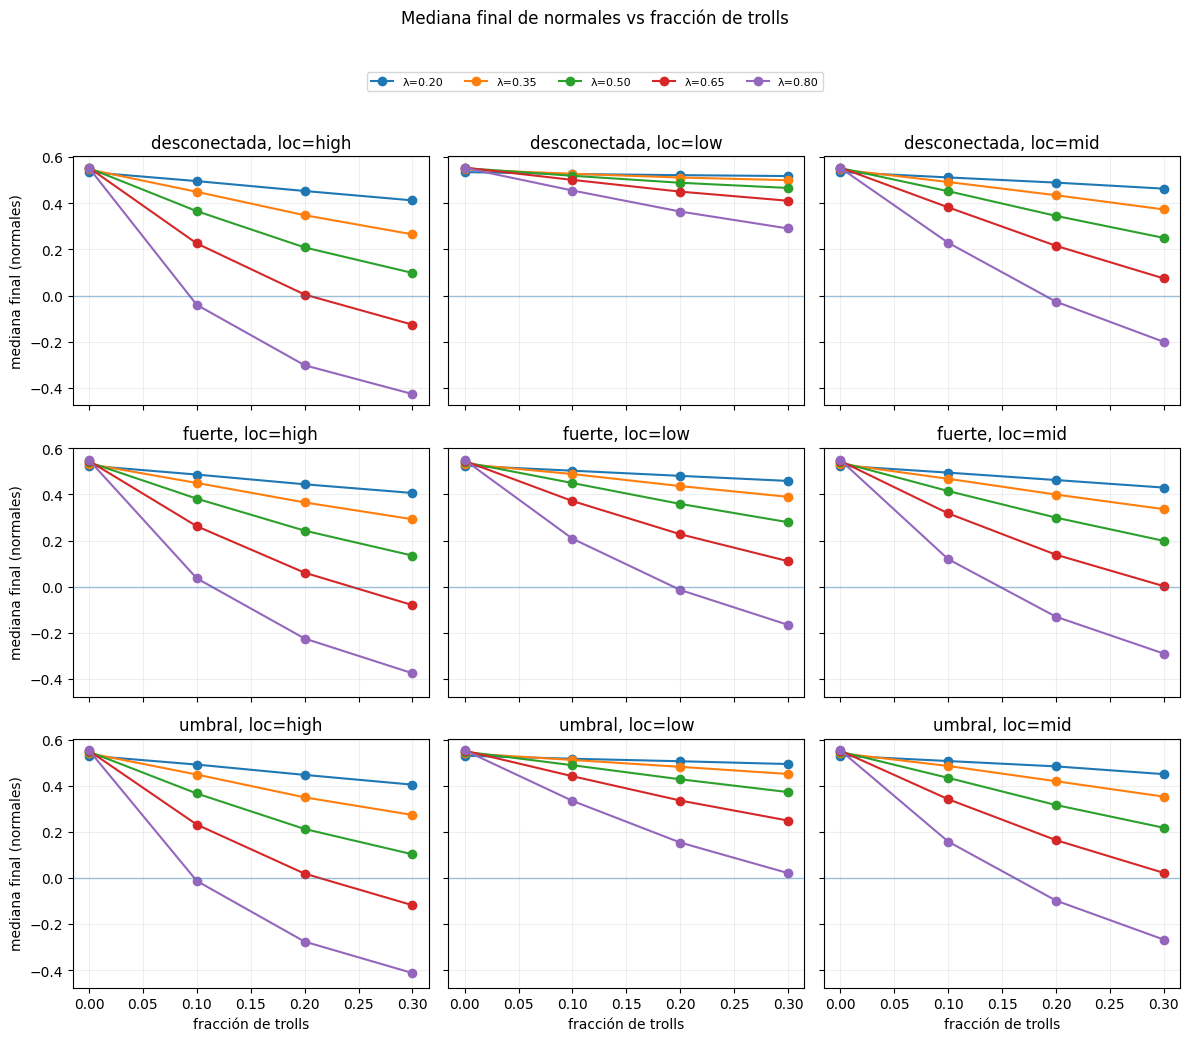

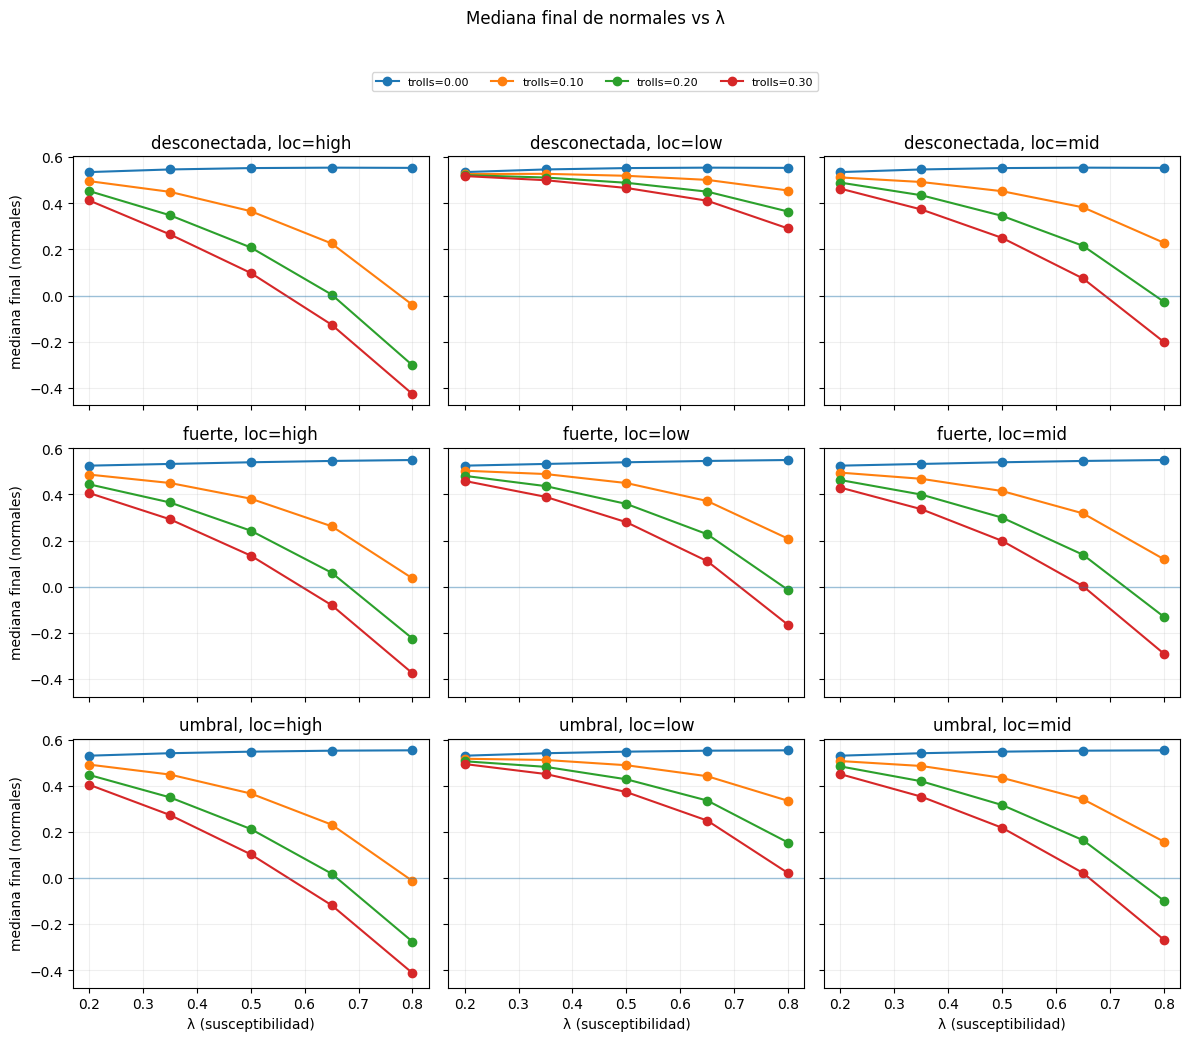

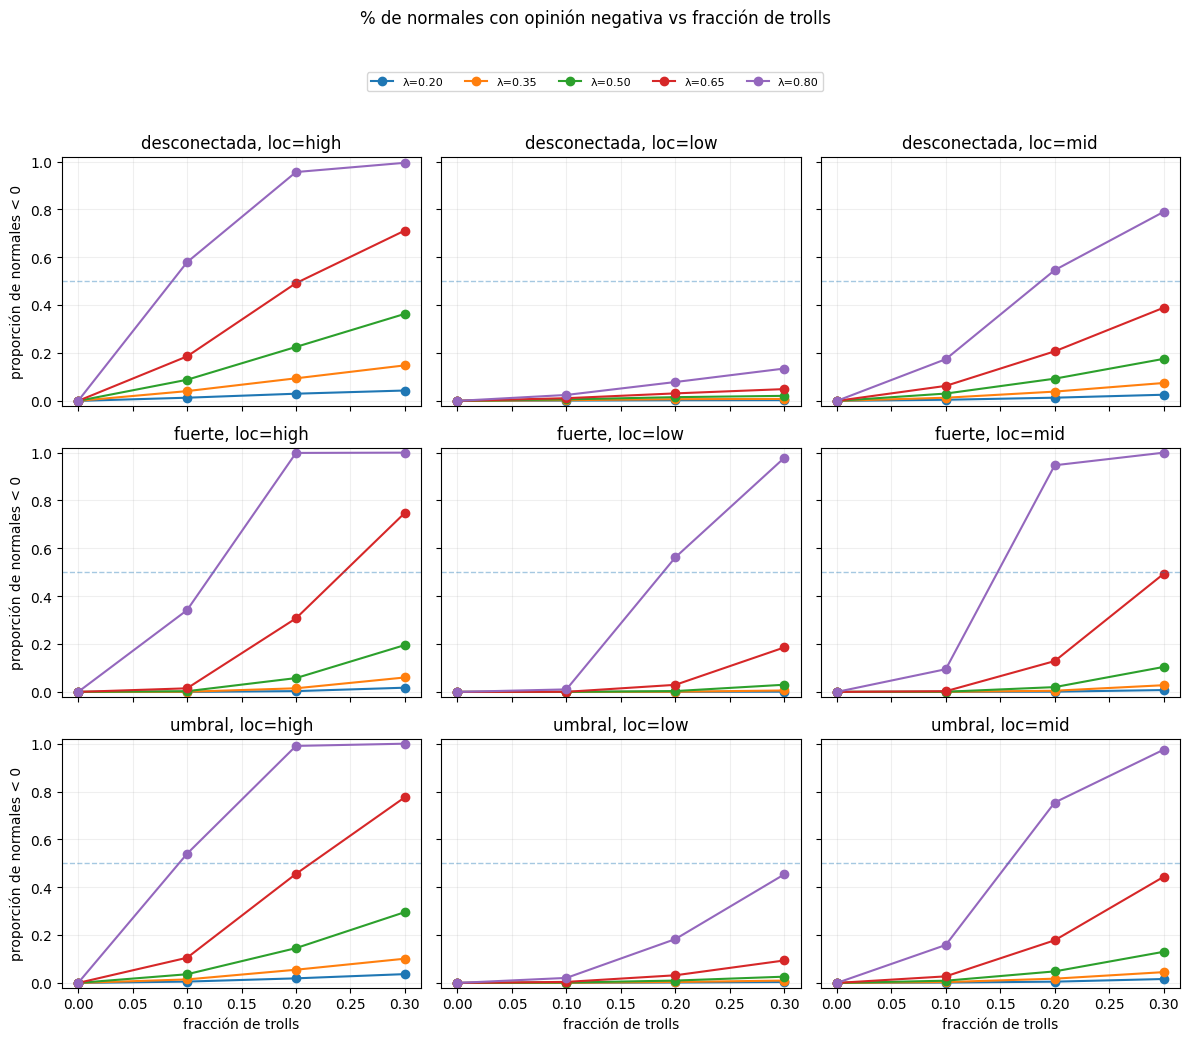

In [ ]:
plot_grid_mediana_vs_trolls(df)
plot_grid_mediana_vs_lambda(df)
plot_grid_share_neg_vs_trolls(df)
